# 1718 kvk data 분석

## 세팅 

In [249]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.ticker as ticker

import re
import os 
import pickle

import warnings

# 경고 메시지 숨기기
warnings.filterwarnings("ignore", category=FutureWarning)


# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
# font_path = "D:/project/fonts/NanumGothic.ttf"
# font_path = 'G:/다른 컴퓨터/My_desktop/project/fonts/NanumGothic.ttf'
font_path = 'G:/다른 컴퓨터/내 컴퓨터/project/fonts/NanumGothic.ttf'
# font_path2 = 'C:/project/fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [250]:
path = 'G:/다른 컴퓨터/내 컴퓨터/project/1718 Kvk 분석'
path2= 'C:/project/1718 Kvk 분석'
filename = '231030_kvk 누적 data.xlsx'

data = pd.read_excel(f'{path}/{filename}', engine='openpyxl')

## 데이터 체크

In [251]:
data.head()

,kvk,기여도 등수,UID,닉네임,투력,킬포,전사,킬포증가,본캐 5티 전사,본캐 4티 전사,본캐 총 전사,본캐 전사 점수,부캐 5티 전사,부캐 4티 전사,부캐 총 전사,부캐 전사 점수,전사 총점,기여도 총점,기여도 점수,추가 기여도 점수,킬포할당량,킬포할당 달성률,5티 보,5티 기,5티 궁,5티 구,4티 보,4티 기,4티 궁,4티 구
0,C11948,51,14594948,ᴹʳSpanner,"62,985,587","2,411,892,844","24,067,973","240,369,902","2,894,622",0,"2,894,622","847,597,050",0,0,0,0,"847,597,050","1,087,966,952","1,087,966,952",NaN,"206,391,775",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C11948,76,31539717,Shadow FoX,"100,018,276","4,801,820,222","16,145,618","593,406,474","632,969",292,"633,261","186,728,550",0,0,0,0,"186,728,550","780,135,024","780,135,024",NaN,"295,706,908",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C11948,49,31651829,허 블,"105,826,758","7,001,365,682","29,388,635","729,411,066","1,060,794",0,"1,060,794","318,230,550","650,991","392,050","1,043,041","73,003,490","391,234,040","1,120,645,106","1,120,645,106",NaN,"317,870,213",2,"111,307","464,346","75,070",268,"83,168",0,"308,882",0
3,C11948,23,31687561,라단테,"101,321,457","12,734,154,301","42,405,177","1,179,218,513","1,409,787",36,"1,409,823","417,454,200","1,056,950","2,796,918","3,853,868","269,762,290","687,216,490","1,901,811,558","1,866,435,003","35,376,555","316,588,023",4,"483,579","194,795","378,334",242,"1,410,168","717,298","669,452",0
4,C11948,26,31725488,ﾠ셋ﾠ,"79,496,968","5,669,438,610","22,625,157","550,859,520","1,098,734","254,220","1,352,954","363,057,000","4,668,390","6,421,609","11,089,999","771,116,990","1,134,173,990","1,718,085,081","1,685,033,510","33,051,571","204,227,078",3,"1,560,966","1,685,213","1,378,520","43,691","1,352,181","2,395,057","2,569,978","104,393"


In [252]:
data.shape

(417, 30)

In [253]:
data.columns

Index(['kvk', '기여도 등수', 'UID', '닉네임', '투력', '킬포', '전사', '킬포증가', '본캐 5티 전사',
       '본캐 4티 전사', '본캐 총 전사', '본캐 전사 점수', '부캐 5티 전사', '부캐 4티 전사', '부캐 총 전사',
       '부캐 전사 점수', '전사 총점', '기여도 총점', '기여도 점수', '추가 기여도 점수', '킬포할당량',
       '킬포할당 달성률', '5티 보', '5티 기', '5티 궁', '5티 구', '4티 보', '4티 기', '4티 궁',
       '4티 구'],
      dtype='object')

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kvk        416 non-null    object 
 1   기여도 등수     416 non-null    float64
 2   UID        417 non-null    int64  
 3   닉네임        416 non-null    object 
 4   투력         415 non-null    float64
 5   킬포         415 non-null    float64
 6   전사         415 non-null    float64
 7   킬포증가       415 non-null    float64
 8   본캐 5티 전사   416 non-null    float64
 9   본캐 4티 전사   416 non-null    float64
 10  본캐 총 전사    416 non-null    float64
 11  본캐 전사 점수   408 non-null    float64
 12  부캐 5티 전사   416 non-null    float64
 13  부캐 4티 전사   416 non-null    float64
 14  부캐 총 전사    416 non-null    float64
 15  부캐 전사 점수   408 non-null    float64
 16  전사 총점      416 non-null    float64
 17  기여도 총점     415 non-null    float64
 18  기여도 점수     415 non-null    float64
 19  추가 기여도 점수  90 non-null     float64
 20  킬포할당량     

In [255]:
unique_uids = data.groupby('kvk')['UID'].nunique()

print(unique_uids)

kvk
C11647    102
C11754    103
C11861    105
C11948    105
Name: UID, dtype: int64


### 결측치 파악

In [256]:
# Check for missing values
missing_values = data.isnull().sum()

missing_values

kvk            1
기여도 등수         1
UID            0
닉네임            1
투력             2
킬포             2
전사             2
킬포증가           2
본캐 5티 전사       1
본캐 4티 전사       1
본캐 총 전사        1
본캐 전사 점수       9
부캐 5티 전사       1
부캐 4티 전사       1
부캐 총 전사        1
부캐 전사 점수       9
전사 총점          1
기여도 총점         2
기여도 점수         2
추가 기여도 점수    327
킬포할당량          2
킬포할당 달성률       2
5티 보         205
5티 기         205
5티 궁         205
5티 구         205
4티 보         205
4티 기         205
4티 궁         205
4티 구         205
dtype: int64

In [257]:
data = data.dropna(subset=['kvk'])
missing_values = data.isnull().sum()

missing_values

kvk            0
기여도 등수         0
UID            0
닉네임            0
투력             1
킬포             1
전사             1
킬포증가           1
본캐 5티 전사       0
본캐 4티 전사       0
본캐 총 전사        0
본캐 전사 점수       8
부캐 5티 전사       0
부캐 4티 전사       0
부캐 총 전사        0
부캐 전사 점수       8
전사 총점          0
기여도 총점         1
기여도 점수         1
추가 기여도 점수    326
킬포할당량          1
킬포할당 달성률       1
5티 보         205
5티 기         205
5티 궁         205
5티 구         205
4티 보         205
4티 기         205
4티 궁         205
4티 구         205
dtype: int64

In [258]:
kvk_결측치 = data[data['킬포'].isnull()]
print(kvk_결측치)


        kvk  기여도 등수       UID  닉네임  투력  킬포  전사  킬포증가  본캐 5티 전사  본캐 4티 전사  \
393  C11647     101  45610153  바 론 NaN NaN NaN   NaN         0         0   

     본캐 총 전사  본캐 전사 점수  부캐 5티 전사  부캐 4티 전사  부캐 총 전사  부캐 전사 점수  전사 총점  기여도 총점  \
393        0       NaN         0         0        0       NaN      0     NaN   

     기여도 점수  추가 기여도 점수  킬포할당량  킬포할당 달성률  5티 보  5티 기  5티 궁  5티 구  4티 보  4티 기  \
393     NaN        NaN    NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     4티 궁  4티 구  
393   NaN   NaN  


In [259]:
data = data.dropna(subset=['킬포'])

* UID만 있던 1건 삭제
* C11647의 바론님 삭제

In [260]:
kvk_결측치 = data[data['기여도 점수'].isnull()]
kvk_결측치

,kvk,기여도 등수,UID,닉네임,투력,킬포,전사,킬포증가,본캐 5티 전사,본캐 4티 전사,본캐 총 전사,본캐 전사 점수,부캐 5티 전사,부캐 4티 전사,부캐 총 전사,부캐 전사 점수,전사 총점,기여도 총점,기여도 점수,추가 기여도 점수,킬포할당량,킬포할당 달성률,5티 보,5티 기,5티 궁,5티 구,4티 보,4티 기,4티 궁,4티 구


* 전사 점수가 0점인 7명 발견
* 영령전 미제출인가? 미제출이라면 시체 목록인가?
* 7건 모두 삭제

In [261]:
data = data.dropna(subset=['기여도 점수'])

In [262]:
missing_values = data.isnull().sum()
missing_values

kvk            0
기여도 등수         0
UID            0
닉네임            0
투력             0
킬포             0
전사             0
킬포증가           0
본캐 5티 전사       0
본캐 4티 전사       0
본캐 총 전사        0
본캐 전사 점수       7
부캐 5티 전사       0
부캐 4티 전사       0
부캐 총 전사        0
부캐 전사 점수       7
전사 총점          0
기여도 총점         0
기여도 점수         0
추가 기여도 점수    325
킬포할당량          0
킬포할당 달성률       0
5티 보         204
5티 기         204
5티 궁         204
5티 구         204
4티 보         204
4티 기         204
4티 궁         204
4티 구         204
dtype: int64

남은 결측치는 0으로 보강

In [263]:
data = data.fillna(0)

* 직전 케빕과 이번 케빕 모두 103명의 본캐
* 접은 사람과 이전온 사람이 있을텐데 흠


In [264]:
# UID 컬럼에 중복된 값이 있는 데이터 추출
duplicated_uids = data[data.duplicated(subset=['UID'], keep=False)]

# 중복된 데이터를 제외한 데이터 추출
deduplicated_data = data.drop_duplicates(subset=['UID'], keep=False)

deduplicated_data

,kvk,기여도 등수,UID,닉네임,투력,킬포,전사,킬포증가,본캐 5티 전사,본캐 4티 전사,본캐 총 전사,본캐 전사 점수,부캐 5티 전사,부캐 4티 전사,부캐 총 전사,부캐 전사 점수,전사 총점,기여도 총점,기여도 점수,추가 기여도 점수,킬포할당량,킬포할당 달성률,5티 보,5티 기,5티 궁,5티 구,4티 보,4티 기,4티 궁,4티 구
13,C11948,88,32534738,연신내도라이바,"112,314,375","6,287,900,763","21,083,418","538,180,139","568,802",0,"568,802","166,632,900",0,0,0,0,"166,632,900","704,813,039","704,813,039",0,"321,106,806",2,0,0,0,0,0,0,0,0
22,C11948,28,33333569,은근히깝침,"92,348,109","10,659,719,532","22,182,723","1,222,021,975","696,485","32,914","729,399","200,020,050",0,"2,597,159","2,597,159","167,147,400","367,167,450","1,589,189,425","1,589,189,425",0,"265,001,176",5,0,0,0,0,"449,733","1,210,169","518,579","418,678"
37,C11948,7,34420097,은근히멋짐,"97,059,443","17,061,132,469","31,463,466","2,493,960,856","987,332","35,251","1,022,583","301,482,825",0,0,0,0,"301,482,825","2,795,443,681","2,795,443,681",0,"272,860,333",9,0,0,0,0,0,0,0,0
38,C11948,81,34439676,코아영,"85,058,585","1,564,298,870","14,690,966","410,489,693","1,071,279","75,415","1,146,694","332,438,550",0,0,0,0,"332,438,550","742,928,243","742,928,243",0,"253,164,097",2,0,0,0,0,0,0,0,0
57,C11948,34,35748007,그적의검,"83,727,332","7,750,814,021","19,718,575","1,008,735,124","1,129,417","151,177","1,280,594","357,572,325",0,"2,045,314","2,045,314","128,261,805","485,834,130","1,494,569,254","1,494,569,254",0,"213,266,429",5,0,0,0,0,"338,525","766,706","514,078","426,005"
58,C11948,75,35767157,WaiterJin,"93,824,791","6,845,350,395","24,065,559","606,063,000","586,003",0,"586,003","173,272,200",0,0,0,0,"173,272,200","809,638,350","779,335,200","30,303,150","265,536,099",2,0,0,0,0,0,0,0,0
59,C11948,45,35829621,민ᴰÖᴸ,"111,493,492","11,619,190,027","26,135,372","1,059,257,993","473,176",0,"473,176","141,952,800",0,"244,290","244,290","16,893,590","158,846,390","1,218,104,383","1,218,104,383",0,"320,810,585",3,0,0,0,0,"90,772","53,105","94,507","5,906"
62,C11948,90,36032387,우 아미,"91,839,692","5,700,240,254","21,301,377","519,655,887","524,891",0,"524,891","157,467,300",0,0,0,0,"157,467,300","677,123,187","677,123,187",0,"206,649,732",3,0,0,0,0,0,0,0,0
69,C11948,56,36996547,빌 에반스,"75,300,750","3,520,888,475","20,156,675","529,610,306","1,765,962","69,970","1,835,932","508,627,575",0,0,0,0,"508,627,575","1,038,237,881","1,038,237,881",0,"255,297,473",2,0,0,0,0,0,0,0,0
71,C11948,83,37545777,79대포ᴷᴼ,"90,168,127","9,275,066,620","25,715,220","571,300,972","528,794",0,"528,794","155,776,800",0,0,0,0,"155,776,800","727,077,772","727,077,772",0,"213,146,618",3,0,0,0,0,0,0,0,0


Deadcat을 제외하고 전부 이전자나 죽은 사람들로 확인됨.
데캣님은 아이디 교체이슈로 uid가 달라짐 -> 최신 uid로 통일

In [265]:
# UID 컬럼 값이 33095130인 데이터를 33547899로 변경
data['UID'].replace(33095130, 33547899, inplace=True)

In [266]:
deduplicated_data = deduplicated_data[deduplicated_data['kvk'] == 'C11647']
deduplicated_data

,kvk,기여도 등수,UID,닉네임,투력,킬포,전사,킬포증가,본캐 5티 전사,본캐 4티 전사,본캐 총 전사,본캐 전사 점수,부캐 5티 전사,부캐 4티 전사,부캐 총 전사,부캐 전사 점수,전사 총점,기여도 총점,기여도 점수,추가 기여도 점수,킬포할당량,킬포할당 달성률,5티 보,5티 기,5티 궁,5티 구,4티 보,4티 기,4티 궁,4티 구
329,C11647,94,32671994,ㅅ1ㅂr,"95,549,927","1,199,966,253","12,681,459","9,298,924","126,766",0,"126,766","25,353,200",0,0,0,0,"25,353,200","34,652,124","34,652,124",0,"265,651,392",4,0,0,0,0,0,0,0,0
334,C11647,98,33089467,2 B,"84,793,930","1,613,002,781","6,496,868","10,243,480",0,0,0,0,0,0,0,0,0,"10,243,480","10,243,480",0,"202,308,151",5,0,0,0,0,0,0,0,0
336,C11647,95,33306462,SONNY,"116,434,132","1,340,823,564","14,401,248","15,367,314","75,017",0,"75,017","15,003,400",0,0,0,0,"15,003,400","30,370,714","30,370,714",0,"319,301,150",5,0,0,0,0,0,0,0,0
346,C11647,101,33881745,프롭시,"84,606,992","1,885,994,897","18,733,627",0,0,0,0,0,0,0,0,0,0,0,0,0,"202,313,882",0,0,0,0,0,0,0,0,0
349,C11647,53,33972893,파 고,"82,378,241","2,028,582,133","9,224,889","210,509,259","488,276",0,"488,276","97,655,200",0,0,0,0,"97,655,200","308,164,459","308,164,459",0,"205,611,391",102,0,0,0,0,0,0,0,0
353,C11647,93,34110279,하아미,"102,341,721","1,514,990,634","13,511,005","48,082,790","130,206",0,"130,206","26,041,200",0,0,0,0,"26,041,200","74,123,990","74,123,990",0,"280,870,831",17,0,0,0,0,0,0,0,0
372,C11647,82,35403109,NaHan,"111,637,825","5,050,952,879","13,648,801","139,464,928",0,0,0,0,0,0,0,0,0,"139,464,928","139,464,928",0,"312,957,462",45,0,0,0,0,0,0,0,0
375,C11647,97,35550326,다미 아부지,"86,533,977","1,264,713,560","13,725,545","23,630,450",0,0,0,0,0,0,0,0,0,"23,630,450","23,630,450",0,"212,524,087",11,0,0,0,0,0,0,0,0
387,C11647,52,37979571,아영,"102,107,971","2,335,122,673","10,496,372","155,321,691","752,822",0,"752,822","150,564,400",0,"105,054","105,054","7,353,780","157,918,180","313,239,871","313,239,871",0,"298,199,437",52,0,0,0,0,"35,245","13,932","55,877",0
394,C11647,101,45927907,루돌프,"79,893,915","362,082,266","10,254,328",0,0,0,0,0,0,0,0,0,0,0,0,0,"158,944,130",0,0,0,0,0,0,0,0,0


C11647 이후 죽은 사람들은 전체 데이터에서 제거해줌

In [267]:
# deduplicated_data에서 index 추출
drop_idx = deduplicated_data.index

# data 데이터프레임에서 해당 인덱스 삭제 후 index reset
data = data.drop(drop_idx).reset_index(drop=True)


### 기여도 0 체크

In [268]:
# kvk 값이 C11754이고 기여도 총점이 0인 데이터 추출
data[(data['kvk'] == 'C11861') & (data['기여도 총점'] == 0)]

,kvk,기여도 등수,UID,닉네임,투력,킬포,전사,킬포증가,본캐 5티 전사,본캐 4티 전사,본캐 총 전사,본캐 전사 점수,부캐 5티 전사,부캐 4티 전사,부캐 총 전사,부캐 전사 점수,전사 총점,기여도 총점,기여도 점수,추가 기여도 점수,킬포할당량,킬포할당 달성률,5티 보,5티 기,5티 궁,5티 구,4티 보,4티 기,4티 궁,4티 구
128,C11861,104,33481215,김 춘 삼 ᴷᴼᴿ,"124,585,397","11,189,051,782","19,734,492",0,0,0,0,0,0,0,0,0,0,0,0,0,"343,254,232",0,0,0,0,0,0,0,0,0


* 이번 kvk에서 기여도 0인 사람 춘삼님 한분
* 춘삼님은 안식 kvk로 861 명단에서 제거

In [269]:
# C11861에서 춘삼님 제거
data = data.drop(23)

### 컬럼들 타입 변경

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 0 to 404
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kvk        404 non-null    object 
 1   기여도 등수     404 non-null    float64
 2   UID        404 non-null    int64  
 3   닉네임        404 non-null    object 
 4   투력         404 non-null    float64
 5   킬포         404 non-null    float64
 6   전사         404 non-null    float64
 7   킬포증가       404 non-null    float64
 8   본캐 5티 전사   404 non-null    float64
 9   본캐 4티 전사   404 non-null    float64
 10  본캐 총 전사    404 non-null    float64
 11  본캐 전사 점수   404 non-null    float64
 12  부캐 5티 전사   404 non-null    float64
 13  부캐 4티 전사   404 non-null    float64
 14  부캐 총 전사    404 non-null    float64
 15  부캐 전사 점수   404 non-null    float64
 16  전사 총점      404 non-null    float64
 17  기여도 총점     404 non-null    float64
 18  기여도 점수     404 non-null    float64
 19  추가 기여도 점수  404 non-null    float64
 20  킬포할당량      404 

* kvk, 기여도 등수, UID, 닉네임, 사르곤, 헨리 를 제외하고는 전부 int로 변경

In [271]:
data.columns

Index(['kvk', '기여도 등수', 'UID', '닉네임', '투력', '킬포', '전사', '킬포증가', '본캐 5티 전사',
       '본캐 4티 전사', '본캐 총 전사', '본캐 전사 점수', '부캐 5티 전사', '부캐 4티 전사', '부캐 총 전사',
       '부캐 전사 점수', '전사 총점', '기여도 총점', '기여도 점수', '추가 기여도 점수', '킬포할당량',
       '킬포할당 달성률', '5티 보', '5티 기', '5티 궁', '5티 구', '4티 보', '4티 기', '4티 궁',
       '4티 구'],
      dtype='object')

In [272]:
import numpy as np

columns_to_convert = ['투력', '킬포', '전사', '킬포증가', '본캐 5티 전사', '본캐 4티 전사', '본캐 총 전사', '본캐 전사 점수',
                      '부캐 5티 전사', '부캐 4티 전사', '부캐 총 전사', '부캐 전사 점수', '전사 총점', '기여도 총점',
                      '기여도 점수', '추가 기여도 점수', '킬포할당량', '킬포할당 달성률', '5티 보', '5티 기', '5티 궁',
                      '5티 구', '4티 보', '4티 기', '4티 궁', '4티 구']

data[columns_to_convert] = data[columns_to_convert].astype(np.int64)


In [273]:
columns_to_convert = ['kvk', '기여도 등수', 'UID', '닉네임']

data[columns_to_convert] = data[columns_to_convert].astype('category')


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 0 to 404
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   kvk        404 non-null    category
 1   기여도 등수     404 non-null    category
 2   UID        404 non-null    category
 3   닉네임        404 non-null    category
 4   투력         404 non-null    int64   
 5   킬포         404 non-null    int64   
 6   전사         404 non-null    int64   
 7   킬포증가       404 non-null    int64   
 8   본캐 5티 전사   404 non-null    int64   
 9   본캐 4티 전사   404 non-null    int64   
 10  본캐 총 전사    404 non-null    int64   
 11  본캐 전사 점수   404 non-null    int64   
 12  부캐 5티 전사   404 non-null    int64   
 13  부캐 4티 전사   404 non-null    int64   
 14  부캐 총 전사    404 non-null    int64   
 15  부캐 전사 점수   404 non-null    int64   
 16  전사 총점      404 non-null    int64   
 17  기여도 총점     404 non-null    int64   
 18  기여도 점수     404 non-null    int64   
 19  추가 기여도 점수  404 non-null    int64  

### UID 분할

In [275]:
data['UID'].describe()


count          404
unique         130
top       33547899
freq             5
Name: UID, dtype: int64

In [276]:
bins = [0, 30000000, 40000000, 50000000, 60000000, 70000000, 80000000, 90000000, 100000000,  20000000000]
labels = ['3 미만', '3 시작', '4 시작', 
          '5 시작', '6 시작', '7 시작',
          '8 시작', '9 시작', '10 이상']
data['UID_range'] = pd.cut(data['UID'], bins=bins, labels=labels)


In [277]:
# 'kvk' 컬럼 값이 'C11861'인 조건을 추가하여 집계하는 코드
count_by_uid_range = data[data['kvk'] == 'C11948']['UID_range'].value_counts().sort_index()
for uid_range, count in count_by_uid_range.items():
    print(f"'kvk' 컬럼 값이 'C11948'이고 {uid_range}에 해당되는 유저는 {count}명입니다.")

'kvk' 컬럼 값이 'C11948'이고 3 미만에 해당되는 유저는 1명입니다.
'kvk' 컬럼 값이 'C11948'이고 3 시작에 해당되는 유저는 71명입니다.
'kvk' 컬럼 값이 'C11948'이고 4 시작에 해당되는 유저는 14명입니다.
'kvk' 컬럼 값이 'C11948'이고 5 시작에 해당되는 유저는 5명입니다.
'kvk' 컬럼 값이 'C11948'이고 6 시작에 해당되는 유저는 4명입니다.
'kvk' 컬럼 값이 'C11948'이고 7 시작에 해당되는 유저는 1명입니다.
'kvk' 컬럼 값이 'C11948'이고 8 시작에 해당되는 유저는 3명입니다.
'kvk' 컬럼 값이 'C11948'이고 9 시작에 해당되는 유저는 3명입니다.
'kvk' 컬럼 값이 'C11948'이고 10 이상에 해당되는 유저는 2명입니다.


In [278]:
# 파일 경로 및 파일 이름
file_path = "231030_KVK 누적 data_전처리완.xlsx"

# 데이터프레임 저장
data.to_excel(file_path, index=False)

In [279]:
filtered_names = data[(data['kvk'] == 'C11948') & (data['UID_range'] == '3 미만')]['닉네임'].values
filtered_names

['ᴹʳSpanner']
Categories (176, object): ['79대포ᴷᴼ', 'BTS2Yourself', 'BTS2yourself', 'DEADCAT', ..., 'ﾒ공습ﾒ', 'ﾠ렐ﾠ', 'ﾠ셋ﾠ', 'ﾠﾠﾠﾠﾠﾠﾠﾠﾠ']

In [280]:
nicknames_by_uid_range = {}
data_c11948 = data[data['kvk'] == 'C11948']

for uid_range in data_c11948['UID_range'].unique():
    nicknames = data_c11948[data_c11948['UID_range'] == uid_range]['닉네임'].values
    nicknames_by_uid_range[uid_range] = nicknames

for uid_range, nicknames in nicknames_by_uid_range.items():
    print(f"{uid_range}에 해당되는 유저들의 닉네임: {', '.join(nicknames)}\n")


3 미만에 해당되는 유저들의 닉네임: ᴹʳSpanner

3 시작에 해당되는 유저들의 닉네임: Shadow FoX, 허 블, 라단테, ﾠ셋ﾠ, 부먹펩시파인애플피자, 최예나, 머왕훍, 서 현 진, Operation, HAWK, 종  건, SYLVA, 연신내도라이바, 악 보, 걍 해, 찬드라굽타, 이 음, 小倉カラス, 메가윈드, 꼬   마, 래브라도 리트리버, 은근히깝침, 바람과 함께 사라지다, 세네갈, HOXy, Deadcat, 민 트, 머왕인절미・ᴥ・, 루   루, MILK, TIGweld, 강아지핥짝핥짝, EJ eee, ᴵᶠ이프, 보거스, 은근히멋짐, 코아영, 브 리 에, 초록 쓰레기, 그적암살단장, 리보피, 하랑하온, 생 수, 천 수, ﾠﾠﾠﾠﾠﾠﾠﾠﾠ, LAlabot, 잉글랜드병사인권위원회, 소 가, 정기간, DOKDO IS KOREA, 머왕그적, 국밥먹고가, ᴰᶜ루핀, 궁수 J, BTS2Yourself, 그적의검, WaiterJin, 민ᴰÖᴸ, ﾠ렐ﾠ, 고양이핥짝핥짝, 우 아미, PPPPPdd, 뱍 이, 김예림, GLUWA, 맹 수, 장님저격수, 빌 에반스, MRI 비급여, 79대포ᴷᴼ, 하 쿠

4 시작에 해당되는 유저들의 닉네임: 포 방, 적비령, LukasKor, E҈x҈E҈, J u I y, 술라펠릭스, 오반아  휘파람을  불어라, 망상토끼, 던퀸도넛, ㅂ ㅅ, 리 버, 망망대해 신민, 낭만단로, 일타강사 백단로

5 시작에 해당되는 유저들의 닉네임: SUREREKA, woOkie, 뭉가당, HitchhikeR, 서울이글스v2

6 시작에 해당되는 유저들의 닉네임: Zflip5 hot girl, 머왕무사, 디   디, 에너지소비효율1등급

7 시작에 해당되는 유저들의 닉네임: ﾒ공습ﾒ

8 시작에 해당되는 유저들의 닉네임: Kimchi warrior, 그라데이션, 인기채

9 시작에 해당되는 유저들의 닉네임: Lumen S, 봉만씨, 모략왕

10 이상에 해당되는 유저들의 닉네임: 도  스, Weedaa



## EDA

### 전체 분석(vs 직전 영찬)

In [281]:
# 소수점 없이 정수로 출력
def round_to_int(value):
    return int(round(value))

pd.options.display.float_format = '{:,.0f}'.format

# 그룹별 계산 결과 출력 함수
def print_group_statistics(group_name, group_data):
    print(f"\n{group_name} 그룹")
    print("킬포증가 합계:", round_to_int(group_data['킬포증가'].sum()))
    print("킬포증가 평균:", round_to_int(group_data['킬포증가'].mean()))
    print("본캐 총 전사 합계:", round_to_int(group_data['본캐 총 전사'].sum()))
    print("본캐 총 전사 평균:", round_to_int(group_data['본캐 총 전사'].mean()))
    print("부캐 총 전사 합계:", round_to_int(group_data['부캐 총 전사'].sum()))
    print("부캐 총 전사 평균:", round_to_int(group_data['부캐 총 전사'].mean()))

# 그룹화된 데이터 계산
grouped_data = data.groupby('kvk')

# 그룹별로 계산 결과 출력
group_names = ['C11647', 'C11754', 'C11861', 'C11948']
for name in group_names:
    print_group_statistics(name, grouped_data.get_group(name))


C11647 그룹
킬포증가 합계: 26010382751
킬포증가 평균: 282721552
본캐 총 전사 합계: 57193359
본캐 총 전사 평균: 621667
부캐 총 전사 합계: 13901368
부캐 총 전사 평균: 151102

C11754 그룹
킬포증가 합계: 52971272358
킬포증가 평균: 514284198
본캐 총 전사 합계: 158178042
본캐 총 전사 평균: 1535709
부캐 총 전사 합계: 110278154
부캐 총 전사 평균: 1070662

C11861 그룹
킬포증가 합계: 80309749554
킬포증가 평균: 764854758
본캐 총 전사 합계: 163351857
본캐 총 전사 평균: 1555732
부캐 총 전사 합계: 212508062
부캐 총 전사 평균: 2023886

C11948 그룹
킬포증가 합계: 91796838583
킬포증가 평균: 882661909
본캐 총 전사 합계: 130752558
본캐 총 전사 평균: 1257236
부캐 총 전사 합계: 156156777
부캐 총 전사 평균: 1501507


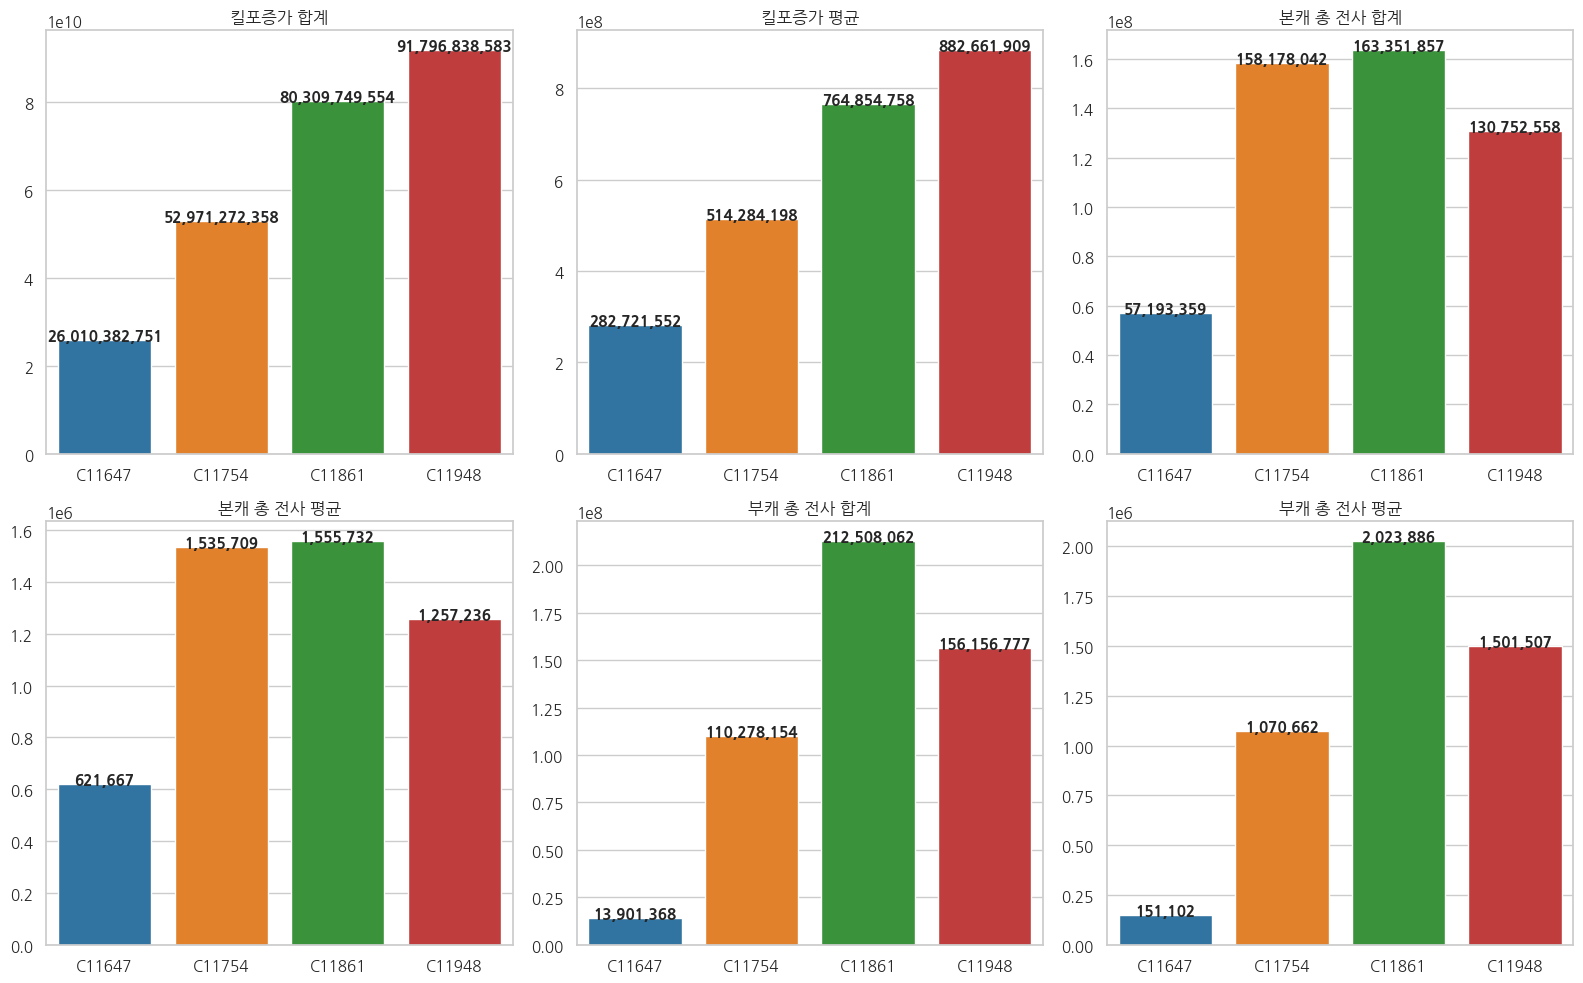

In [282]:
def draw_grouped_data(grouped_data, group_keys):
    fig, ax = plt.subplots(2, 3, figsize=(16, 10))
    palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

    metrics = [
        ('킬포증가', 'sum', '킬포증가 합계'),
        ('킬포증가', 'mean', '킬포증가 평균'),
        ('본캐 총 전사', 'sum', '본캐 총 전사 합계'),
        ('본캐 총 전사', 'mean', '본캐 총 전사 평균'),
        ('부캐 총 전사', 'sum', '부캐 총 전사 합계'),
        ('부캐 총 전사', 'mean', '부캐 총 전사 평균')
    ]

    for idx, (column, method, title) in enumerate(metrics):
        values = [getattr(grouped_data.get_group(key)[column], method)() for key in group_keys]
        sns.barplot(x=group_keys, y=values, ax=ax[idx // 3, idx % 3], palette=palette)
        ax[idx // 3, idx % 3].set_title(title)
        for i, v in enumerate(values):
            ax[idx // 3, idx % 3].text(i, v, '{:,.0f}'.format(v), ha='center', fontweight='bold', fontsize=11)

    plt.tight_layout()
    plt.show()

# 그룹화된 데이터 계산
grouped_data = data.groupby('kvk')
group_names = ['C11647', 'C11754', 'C11861', 'C11948']

# 시각화 함수 호출
draw_grouped_data(grouped_data, group_names)

#### 왕국 킬포 증가량

#### 평균 킬포 증가량

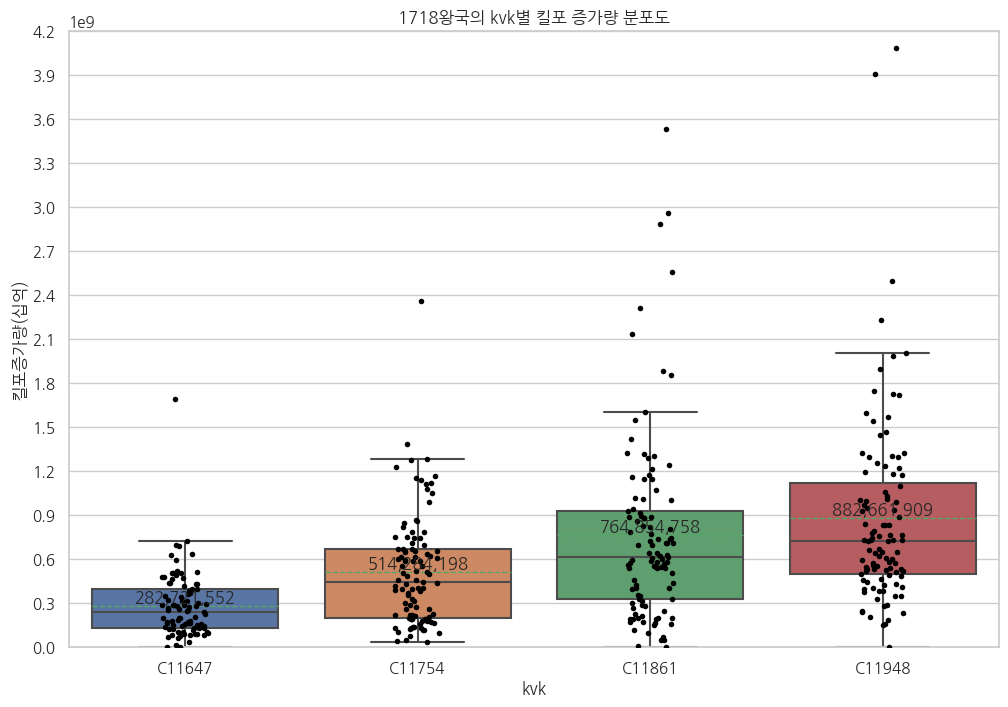

In [283]:
plt.figure(figsize=(12, 8))
# 'kvk' 컬럼의 값 별로 '킬포증가' 값의 분포를 확인하는 boxplot 그리기
sns.boxplot(x='kvk', y='킬포증가', data=data, showfliers=False, showmeans=True, meanline=True)

# 'kvk' 컬럼의 값 별로 '킬포증가' 값의 분포를 scatter plot으로 보여주기
sns.stripplot(x='kvk', y='킬포증가', data=data, color='black', size=4)

# boxplot별 평균값 계산
mean_values = data.groupby('kvk')['킬포증가'].mean()

# 평균선에 라벨값 추가
for i, mean_val in enumerate(mean_values):
    plt.text(i, mean_val, f'{mean_val:,.0f}', horizontalalignment='center', verticalalignment='bottom', fontsize=12)

# 그래프 제목 추가
plt.title("1718왕국의 kvk별 킬포 증가량 분포도")

# y축 라벨 추가 및 y축 단위 조정
plt.ylabel('킬포증가량(십억)')
plt.ylim(0, 4200000000)
plt.yticks(range(0, 4200000001, 300000000))

# 그래프 출력
plt.show()


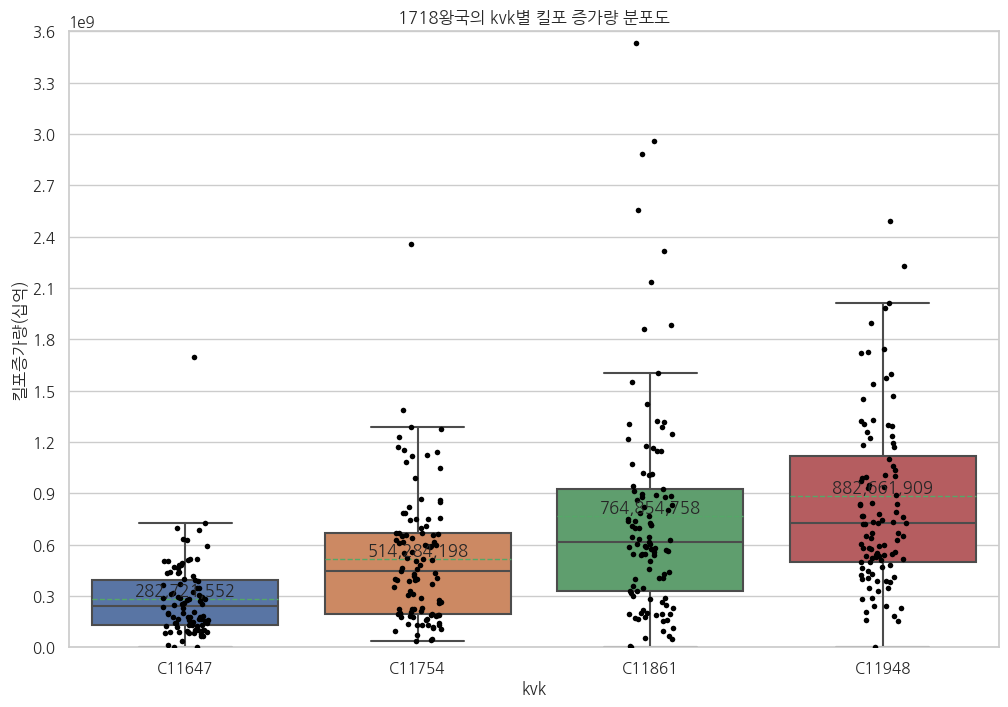

In [284]:
plt.figure(figsize=(12, 8))
# 'kvk' 컬럼의 unique한 값들을 오름차순으로 정렬
kvk_unique_sorted = sorted(data['kvk'].unique())

# 'kvk' 컬럼의 값 별로 '킬포증가' 값의 분포를 확인하는 boxplot 그리기
sns.boxplot(x='kvk', y='킬포증가', data=data, order=kvk_unique_sorted, showfliers=False, showmeans=True, meanline=True)

# 'kvk' 컬럼의 값 별로 '킬포증가' 값의 분포를 scatter plot으로 보여주기
sns.stripplot(x='kvk', y='킬포증가', data=data, order=kvk_unique_sorted, color='black', size=4)

# boxplot별 평균값 계산
mean_values = data.groupby('kvk')['킬포증가'].mean()

# 평균선에 라벨값 추가
for i, mean_val in enumerate(mean_values[kvk_unique_sorted]):
    plt.text(i, mean_val, f'{mean_val:,.0f}', horizontalalignment='center', verticalalignment='bottom', fontsize=12)

# 그래프 제목 추가
plt.title("1718왕국의 kvk별 킬포 증가량 분포도")

# y축 라벨 추가 및 y축 단위 조정
plt.ylabel('킬포증가량(십억)')
plt.ylim(0, 3600000000)
plt.yticks(range(0, 3600000001, 300000000))

# 그래프 출력
plt.show()


#### 평균 전사량(5티 & 4티)

###

### 전사 분석

#### 평균 본캐 전사

#### 평균 부캐 전사

## 통계 describe

In [285]:
# 'kvk' 컬럼의 값 별로 '킬포증가', '본캐 총 전사' 값의 합을 계산하는 코드
result = data.groupby('kvk').agg({'킬포증가': 'sum', '본캐 총 전사': 'sum'})

# '킬포증가'의 평균, 중위, 1분위, 2분위, 3분위, 4분위 값 계산
quantiles = [.25, .5, .75]
result[('킬포증가', 'mean')] = data.groupby('kvk')['킬포증가'].mean()
result[('킬포증가', 'median')] = data.groupby('kvk')['킬포증가'].median()
result[('킬포증가', 'quantile')] = data.groupby('kvk')['킬포증가'].apply(lambda x: [x.quantile(q) for q in quantiles])

# 결과 출력
print(result)


               킬포증가    본캐 총 전사  (킬포증가, mean)  (킬포증가, median)  \
kvk                                                            
C11647  26010382751   57193359   282,721,552     240,676,172   
C11754  52971272358  158178042   514,284,198     445,348,748   
C11861  80309749554  163351857   764,854,758     617,793,243   
C11948  91796838583  130752558   882,661,909     724,951,880   

                                 (킬포증가, quantile)  
kvk                                                
C11647  [129531828.75, 240676172.0, 395082208.75]  
C11754    [197182362.0, 445348748.0, 668645769.0]  
C11861    [328893807.0, 617793243.0, 925626581.0]  
C11948   [497925684.5, 724951880.0, 1119082204.0]  


### 특정 분석

#### 사르곤단

In [286]:
# 'kvk' 컬럼 값이 'C11861'이고 사르곤 값이 1인 데이터 추출

#### 헨리단

#### 트라야 vs 비트라야

#### UID 구간 별 분석

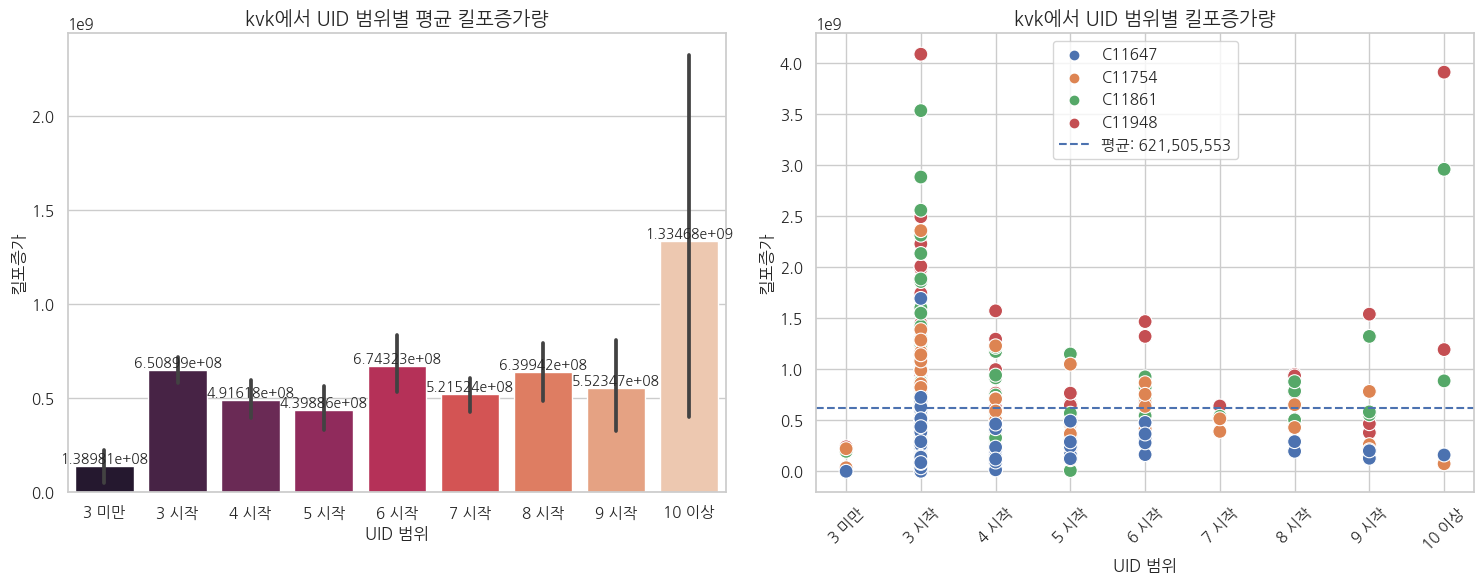

In [287]:
# 시각화를 위한 matplotlib figure와 axes 설정
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

# 첫 번째 plot (bar plot) 설정
# 여기서는 UID_range별 평균 킬포증가량을 bar plot으로 나타냅니다.
sns.barplot(x='UID_range', y='킬포증가', data=data, palette='rocket', ax=ax[0])
ax[0].set_title('kvk에서 UID 범위별 평균 킬포증가량', fontsize=14)
ax[0].set_xlabel('UID 범위', fontsize=12)
ax[0].set_ylabel('킬포증가', fontsize=12)
# 각 bar에 대한 값을 표시합니다.
for p in ax[0].containers:
    ax[0].bar_label(p, label_type='edge', fontsize=10)

# 두 번째 plot (scatter plot) 설정
# 여기서는 각 UID_range와 킬포증가량을 scatter plot으로 나타내고, kvk에 따라 색을 다르게 합니다.
sns.scatterplot(x='UID_range', y='킬포증가', data=data, hue='kvk', palette='deep', s=100, ax=ax[1])
ax[1].set_title('kvk에서 UID 범위별 킬포증가량', fontsize=14)
ax[1].set_xlabel('UID 범위', fontsize=12)
ax[1].set_ylabel('킬포증가', fontsize=12)
# x축의 레이블을 회전시켜서 가독성을 높입니다.
plt.setp(ax[1].get_xticklabels(), rotation=45)

# 데이터의 평균 킬포증가량을 계산하고, 이를 scatter plot에 수평선으로 표시합니다.
mean_value = np.mean(data['킬포증가'])
ax[1].axhline(mean_value, color='b', linestyle='--', label=f'평균: {mean_value:,.0f}')
ax[1].legend()

# plot을 잘 보이게 레이아웃을 조정합니다.
plt.tight_layout()

# 생성된 figure를 표시합니다.
plt.show()

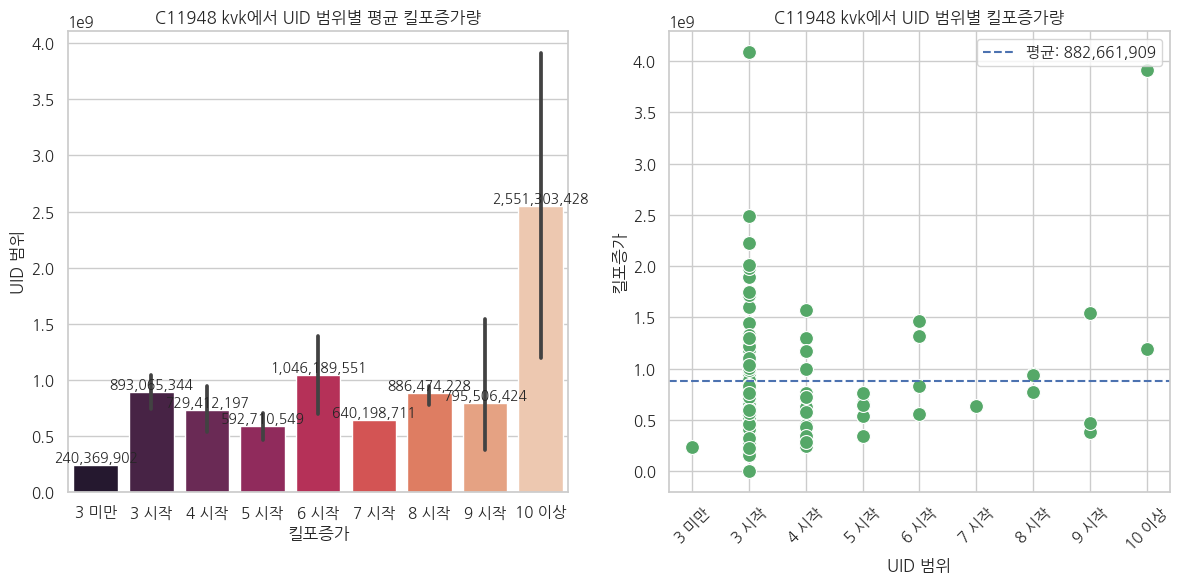

In [288]:
def plot_kvk_data(data, kvk_code):
    data_kvk = data[data['kvk'] == kvk_code]
    fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
    
    sns.barplot(x='UID_range', y='킬포증가', data=data_kvk, palette='rocket', ax=ax[0])
    ax[0].set_title(f'{kvk_code} kvk에서 UID 범위별 평균 킬포증가량')
    ax[0].set_xlabel('킬포증가', fontsize=12)
    ax[0].set_ylabel('UID 범위', fontsize=12)
    for p in ax[0].containers:
        ax[0].bar_label(p, label_type='edge', labels=[f"{int(round(height)):,}" if height > 0 else '0' for height in p.datavalues], fontsize=10)

    sns.scatterplot(x='UID_range', y='킬포증가', data=data_kvk, color='g', s=100, ax=ax[1])
    ax[1].set_title(f'{kvk_code} kvk에서 UID 범위별 킬포증가량')
    ax[1].set_xlabel('UID 범위', fontsize=12)
    ax[1].set_ylabel('킬포증가', fontsize=12)
    plt.setp(ax[1].get_xticklabels(), rotation=45)

    mean_value = np.mean(data_kvk['킬포증가'])
    ax[1].axhline(mean_value, color='b', linestyle='--', label=f'평균: {mean_value:,.0f}')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# 사용 예시
plot_kvk_data(data, 'C11948')


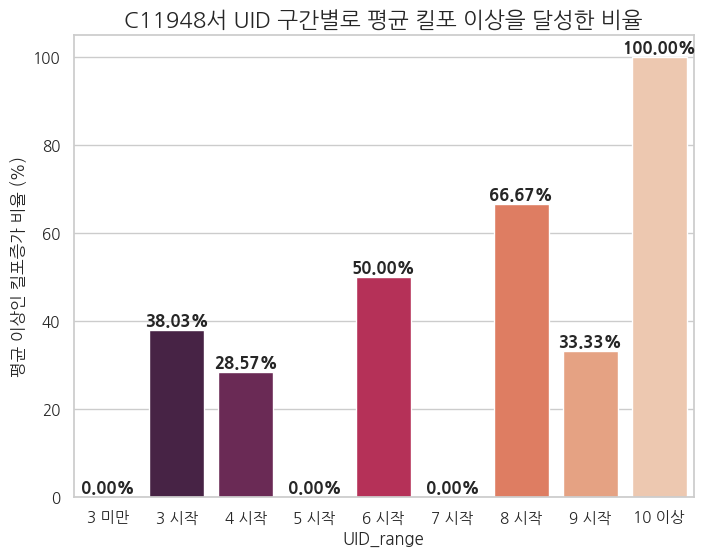

In [289]:
# 'kvk' 컬럼 값이 'C11948'인 데이터로 필터링
data_c11948 = data[data['kvk'] == 'C11948']

# '킬포증가' 컬럼의 평균 계산
kill_growth_mean = data_c11948['킬포증가'].mean()

# 'UID_range' 컬럼의 구간별로 '킬포증가' 컬럼의 평균 이상인 값들의 비율 계산
above_mean = data_c11948[data_c11948['킬포증가'] >= kill_growth_mean].groupby('UID_range')['UID_range'].count()
total = data_c11948.groupby('UID_range')['UID_range'].count()
ratio = above_mean / total

# 퍼센트로 변환
ratio_percent = ratio * 100

# bar plot으로 시각화
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=ratio_percent.index, y=ratio_percent.values, palette='rocket')
ax.set_title("C11948서 UID 구간별로 평균 킬포 이상을 달성한 비율", fontsize=16)
ax.set_xlabel('UID_range')
ax.set_ylabel('평균 이상인 킬포증가 비율 (%)')
for i, val in enumerate(ratio_percent.values):
    ax.text(i, val, f'{val:.2f}%', horizontalalignment='center', verticalalignment='bottom', fontweight='bold')
plt.show()


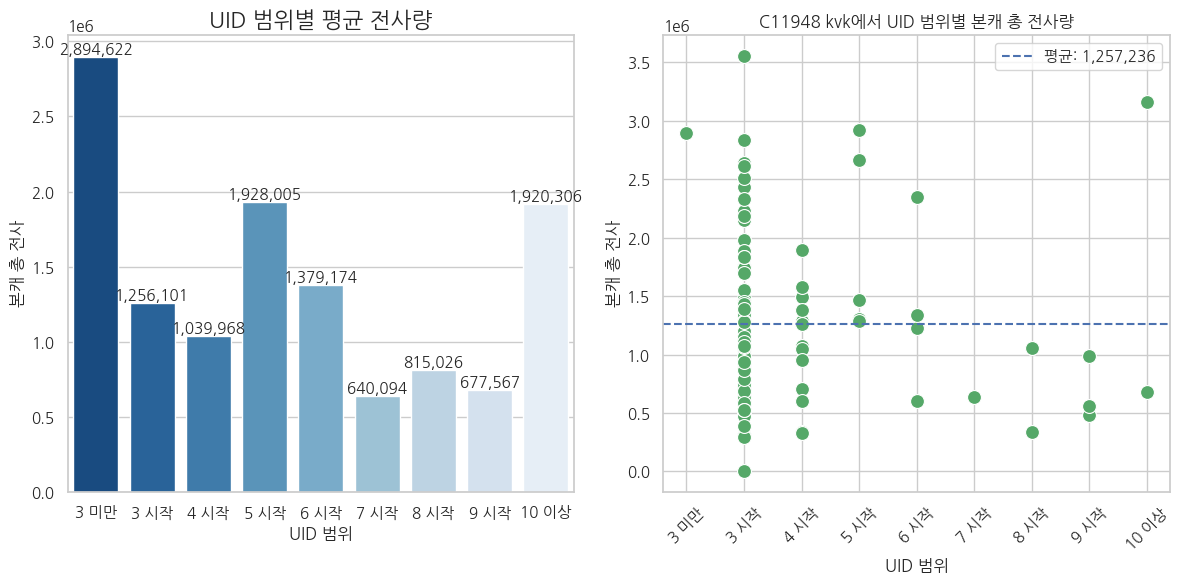

In [290]:
# Calculate the mean of the '본캐 총 전사' column grouped by 'UID_range'
total_kill_mean = data_c11948.groupby('UID_range')['본캐 총 전사'].mean()

# Create a figure with subplots
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

# Bar plot on the left subplot
sns.barplot(x=total_kill_mean.index, y=total_kill_mean.values, palette='Blues_r', ax=ax[0])
ax[0].set_title('UID 범위별 평균 전사량', fontsize=16)
ax[0].set_xlabel('UID 범위', fontsize=12)
ax[0].set_ylabel('본캐 총 전사', fontsize=12)
for p in ax[0].containers:
    ax[0].bar_label(p, label_type='edge', labels=[f'{int(round(height)):,}' if height > 0 else '0' for height in p.datavalues], fontsize=11)

# Scatter plot on the right subplot
sns.scatterplot(x='UID_range', y='본캐 총 전사', data=data_c11948, color='g', s=100, ax=ax[1])
ax[1].set_title('C11948 kvk에서 UID 범위별 본캐 총 전사량')
ax[1].set_xlabel('UID 범위', fontsize=12)
ax[1].set_ylabel('본캐 총 전사', fontsize=12)
# Rotate x-axis labels by 45 degrees
plt.setp(ax[1].get_xticklabels(), rotation=45)

# Add a horizontal line on the scatter plot for the mean value
mean_value = np.mean(data_c11948['본캐 총 전사'])
ax[1].axhline(mean_value, color='b', linestyle='--', label=f'평균: {mean_value:,.0f}')
ax[1].legend()

# Set the tight layout for the figure
fig.tight_layout()

# Show the plot
plt.show()


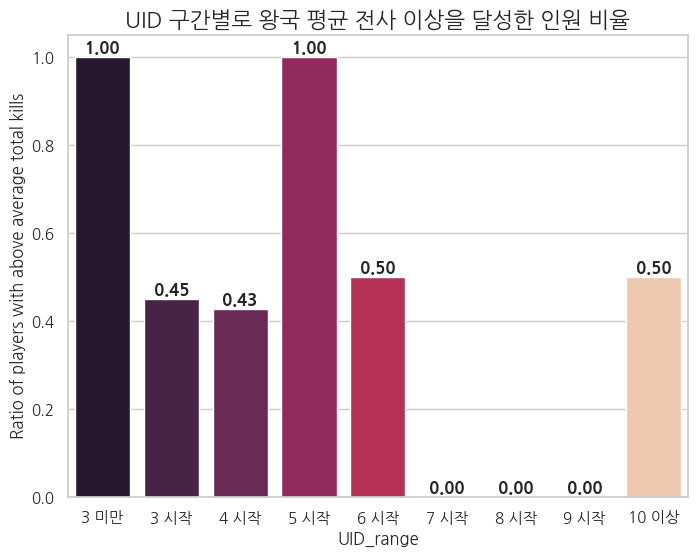

In [291]:
# Calculate the mean of the '본캐 총 전사' column
total_kill_mean = data_c11948['본캐 총 전사'].mean()

# Calculate the ratio of values in the '본캐 총 전사' column that are above the mean, grouped by the 'UID_range' column
above_mean = data_c11948[data_c11948['본캐 총 전사'] >= total_kill_mean].groupby('UID_range')['UID_range'].count()
total = data_c11948.groupby('UID_range')['UID_range'].count()
ratio = above_mean / total

# Create a bar plot to visualize the ratio values by UID_range
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=ratio.index, y=ratio.values, palette='rocket')
ax.set_title('UID 구간별로 왕국 평균 전사 이상을 달성한 인원 비율', fontsize=16)
ax.set_xlabel('UID_range')
ax.set_ylabel('Ratio of players with above average total kills')
for i, val in enumerate(ratio.values):
    ax.text(i, val, f'{val:.2f}', horizontalalignment='center', verticalalignment='bottom', fontweight='bold')
plt.show()

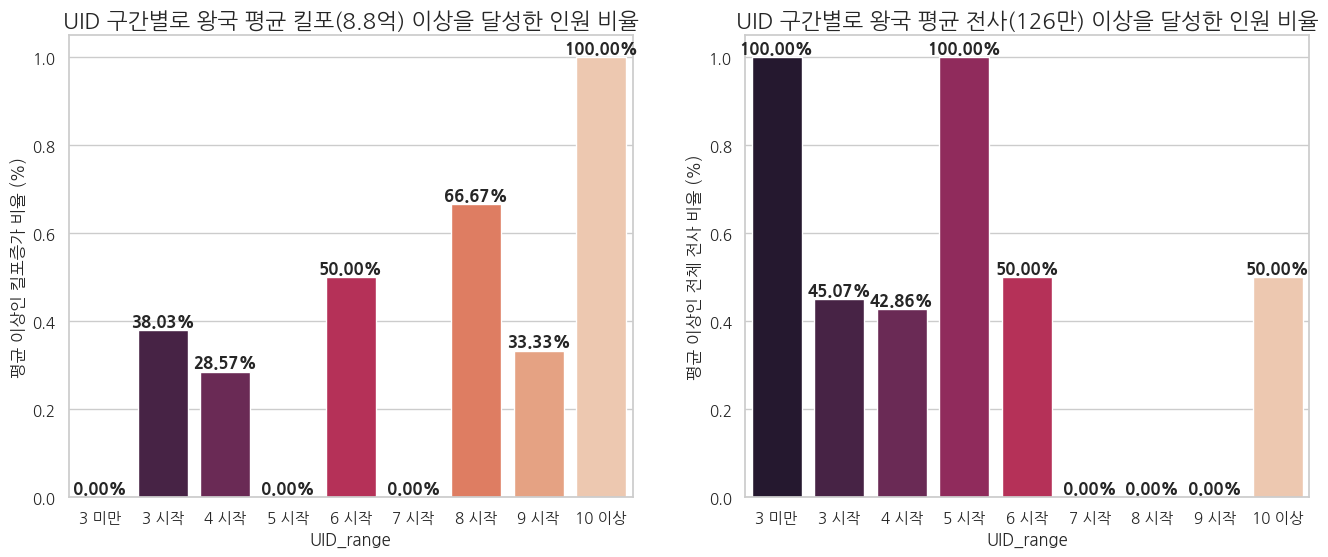

In [292]:
# Calculate the mean of the '킬포증가' column
kill_growth_mean = data_c11948['킬포증가'].mean()

# Calculate the ratio of values in the '킬포증가' column that are above the mean, grouped by the 'UID_range' column
above_mean = data_c11948[data_c11948['킬포증가'] >= kill_growth_mean].groupby('UID_range')['UID_range'].count()
total = data_c11948.groupby('UID_range')['UID_range'].count()
ratio_kill = above_mean / total

# Create a bar plot to visualize the ratio values by UID_range for '킬포증가' column
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=ratio_kill.index, y=ratio_kill.values, palette='rocket', ax=ax[0])
ax[0].set_title('UID 구간별로 왕국 평균 킬포(8.8억) 이상을 달성한 인원 비율', fontsize=16)
ax[0].set_xlabel('UID_range')
ax[0].set_ylabel('평균 이상인 킬포증가 비율 (%)')
for i, val in enumerate(ratio_kill.values):
    ax[0].text(i, val, f'{val*100:.2f}%', horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

# Calculate the mean of the '본캐 총 전사' column
total_kill_mean = data_c11948['본캐 총 전사'].mean()

# Calculate the ratio of values in the '본캐 총 전사' column that are above the mean, grouped by the 'UID_range' column
above_mean = data_c11948[data_c11948['본캐 총 전사'] >= total_kill_mean].groupby('UID_range')['UID_range'].count()
total = data_c11948.groupby('UID_range')['UID_range'].count()
ratio_total_kill = above_mean / total

# Create a bar plot to visualize the ratio values by UID_range for '본캐 총 전사' column
sns.barplot(x=ratio_total_kill.index, y=ratio_total_kill.values, palette='rocket', ax=ax[1])
ax[1].set_title('UID 구간별로 왕국 평균 전사(126만) 이상을 달성한 인원 비율', fontsize=16)
ax[1].set_xlabel('UID_range')
ax[1].set_ylabel('평균 이상인 전체 전사 비율 (%)')
for i, val in enumerate(ratio_total_kill.values):
    ax[1].text(i, val, f'{val*100:.2f}%', horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

plt.show()


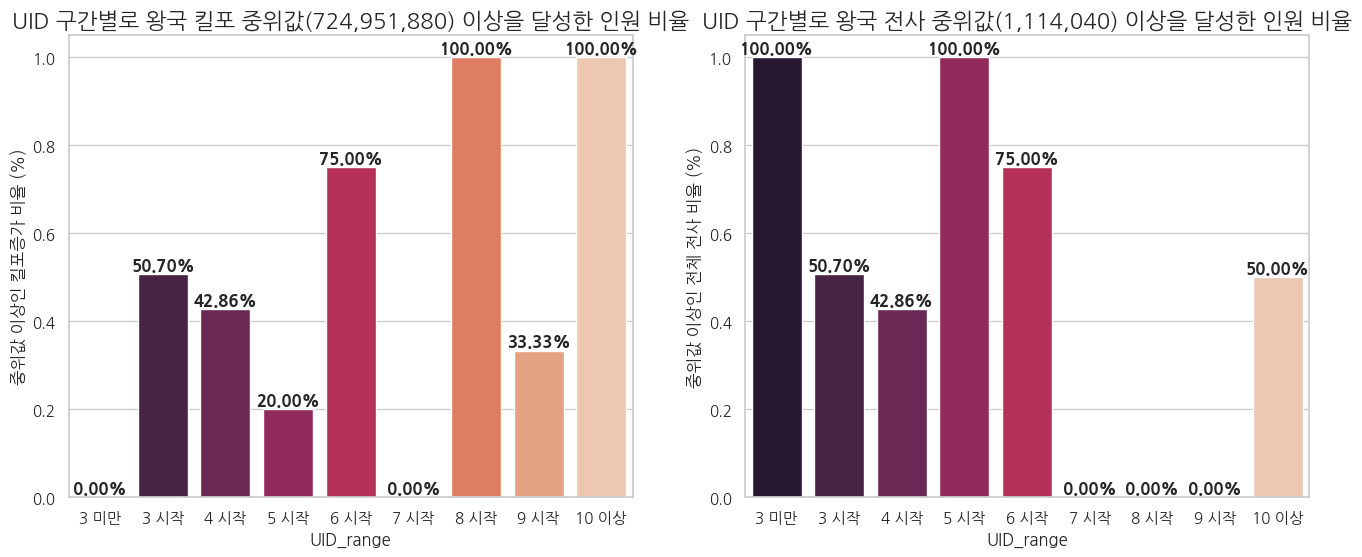

In [293]:
def visualize_data(data_c11948):
    # Calculate the median of the '킬포증가' column
    kill_growth_median = data_c11948['킬포증가'].median()

    # Calculate the ratio of values in the '킬포증가' column that are above the median, grouped by the 'UID_range' column
    above_median = data_c11948[data_c11948['킬포증가'] >= kill_growth_median].groupby('UID_range')['UID_range'].count()
    total = data_c11948.groupby('UID_range')['UID_range'].count()
    ratio_kill = above_median / total

    # Create a bar plot to visualize the ratio values by UID_range for '킬포증가' column
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    sns.barplot(x=ratio_kill.index, y=ratio_kill.values, palette='rocket', ax=ax[0])
    ax[0].set_title(f'UID 구간별로 왕국 킬포 중위값({kill_growth_median:,.0f}) 이상을 달성한 인원 비율', fontsize=16)
    ax[0].set_xlabel('UID_range')
    ax[0].set_ylabel('중위값 이상인 킬포증가 비율 (%)')
    for i, val in enumerate(ratio_kill.values):
        ax[0].text(i, val, f'{val*100:.2f}%', horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

    # Calculate the median of the '본캐 총 전사' column
    total_kill_median = data_c11948['본캐 총 전사'].median()

    # Calculate the ratio of values in the '본캐 총 전사' column that are above the median, grouped by the 'UID_range' column
    above_median = data_c11948[data_c11948['본캐 총 전사'] >= total_kill_median].groupby('UID_range')['UID_range'].count()
    total = data_c11948.groupby('UID_range')['UID_range'].count()
    ratio_total_kill = above_median / total

    # Create a bar plot to visualize the ratio values by UID_range for '본캐 총 전사' column
    sns.barplot(x=ratio_total_kill.index, y=ratio_total_kill.values, palette='rocket', ax=ax[1])
    ax[1].set_title(f'UID 구간별로 왕국 전사 중위값({total_kill_median:,.0f}) 이상을 달성한 인원 비율', fontsize=16)
    ax[1].set_xlabel('UID_range')
    ax[1].set_ylabel('중위값 이상인 전체 전사 비율 (%)')
    for i, val in enumerate(ratio_total_kill.values):
        ax[1].text(i, val, f'{val*100:.2f}%', horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

    plt.show()

visualize_data(data_c11948)

In [294]:
# 'kvk' 값이 C11861이고 'UID' 값이 높은 상위 10개 데이터 추출

df_under3 = data[data['UID_range'] == '3 미만']
print(f"UID 3 미만 명단:\n{df_under3['닉네임'].unique()}")

UID 3 미만 명단:
['ᴹʳSpanner', 'SGMH', 'Spanner']
Categories (176, object): ['79대포ᴷᴼ', 'BTS2Yourself', 'BTS2yourself', 'DEADCAT', ..., 'ﾒ공습ﾒ', 'ﾠ렐ﾠ', 'ﾠ셋ﾠ', 'ﾠﾠﾠﾠﾠﾠﾠﾠﾠ']


#### 치타단

In [295]:
# 'UID' 열의 데이터 유형을 'int'로 변환
data['UID'] = data['UID'].astype(int)

# 'kvk' 값이 C11948이고 'UID' 값이 높은 상위 10개 데이터 추출
data_top10 = data[data['kvk'] == 'C11948'].nlargest(10, 'UID')

# 킬포증가량을 기준으로 데이터를 오름차순 정렬
data_top10 = data_top10.sort_values('킬포증가')

print(f"치타단 명단:\n{data_top10['닉네임'].unique()}")


치타단 명단:
['Lumen S', '모략왕', 'ﾒ공습ﾒ', 'Kimchi warrior', '에너지소비효율1등급', '인기채', '그라데이션', '도  스', '봉만씨', 'Weedaa']
Categories (176, object): ['79대포ᴷᴼ', 'BTS2Yourself', 'BTS2yourself', 'DEADCAT', ..., 'ﾒ공습ﾒ', 'ﾠ렐ﾠ', 'ﾠ셋ﾠ', 'ﾠﾠﾠﾠﾠﾠﾠﾠﾠ']


## 병종 별 전사 체크

In [296]:
# Select the columns of interest
cols_of_interest = ['kvk', '5티 보', '5티 기', '5티 궁', '5티 구', '4티 보', '4티 기', '4티 궁', '4티 구']

# Calculate the sum for each kvk
grouped_data = data[cols_of_interest].groupby('kvk').sum()

grouped_data.head()


,5티 보,5티 기,5티 궁,5티 구,4티 보,4티 기,4티 궁,4티 구
kvk,,,,,,,,
C11647,1177443,2788033,669250,77598,1008051,5493369,2010363,175548
C11754,7785635,7967879,4690278,439142,30029672,29075957,21786239,8503352
C11861,13527593,12364176,10110440,1234188,55763038,43315897,65846404,10346326
C11948,8197526,12438708,7034058,873139,30303593,46320279,43246049,7743425


In [297]:
# 'kvk' 값을 인자로 받는 함수 정의
def compute_sums_by_kvk(kvk_value):
    subset_data = data[data['kvk'] == kvk_value]

    # Compute the sum of each column for the given 'kvk'
    sum_5t_bo = subset_data['5티 보'].sum()
    sum_5t_ki = subset_data['5티 기'].sum()
    sum_5t_gung = subset_data['5티 궁'].sum()
    sum_5t_gu = subset_data['5티 구'].sum()

    sum_4t_bo = subset_data['4티 보'].sum()
    sum_4t_ki = subset_data['4티 기'].sum()
    sum_4t_gung = subset_data['4티 궁'].sum()
    sum_4t_gu = subset_data['4티 구'].sum()

    # Create dataframes for the sum of each troop type
    sums_5t = pd.DataFrame({
        'Type': ['5티 보', '5티 기', '5티 궁', '5티 구'],
        'Sum': [sum_5t_bo, sum_5t_ki, sum_5t_gung, sum_5t_gu]
    })

    sums_4t = pd.DataFrame({
        'Type': ['4티 보', '4티 기', '4티 궁', '4티 구'],
        'Sum': [sum_4t_bo, sum_4t_ki, sum_4t_gung, sum_4t_gu]
    })

    return sums_5t, sums_4t

# 원하는 'kvk' 값으로 함수 호출 예제
kvk_value = "C11948"
sums_5t, sums_4t = compute_sums_by_kvk(kvk_value)
sums_5t, sums_4t


(   Type       Sum
 0  5티 보   8197526
 1  5티 기  12438708
 2  5티 궁   7034058
 3  5티 구    873139,
    Type       Sum
 0  4티 보  30303593
 1  4티 기  46320279
 2  4티 궁  43246049
 3  4티 구   7743425)

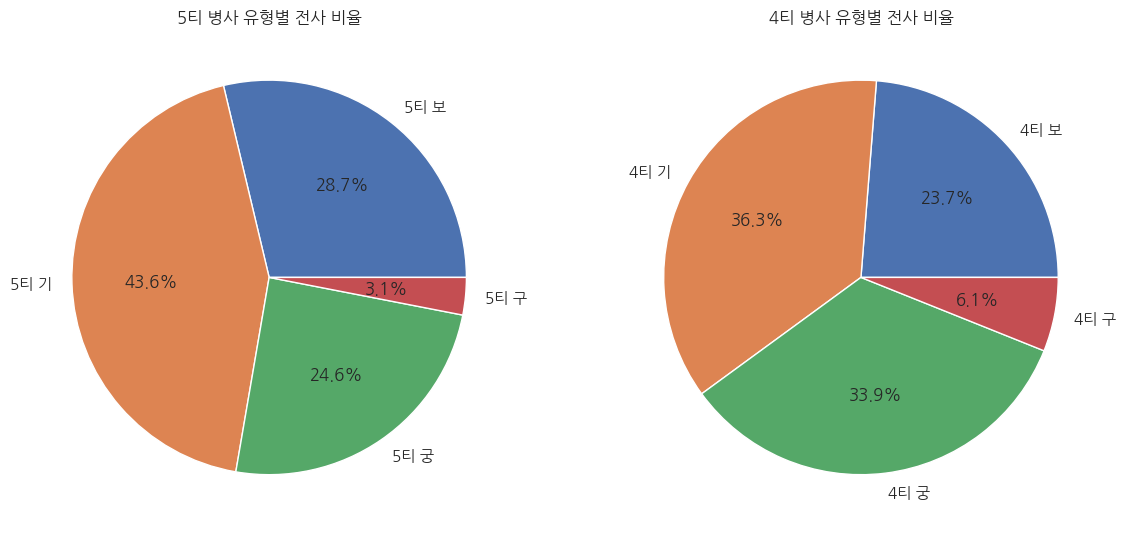

In [298]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Create the pie chart for 5-tier troops
ax[0].pie(sums_5t['Sum'], labels=sums_5t['Type'], autopct='%1.1f%%')
ax[0].set_title('5티 병사 유형별 전사 비율')

# Create the pie chart for 4-tier troops
ax[1].pie(sums_4t['Sum'], labels=sums_4t['Type'], autopct='%1.1f%%')
ax[1].set_title('4티 병사 유형별 전사 비율')

# Show the plot
plt.show()


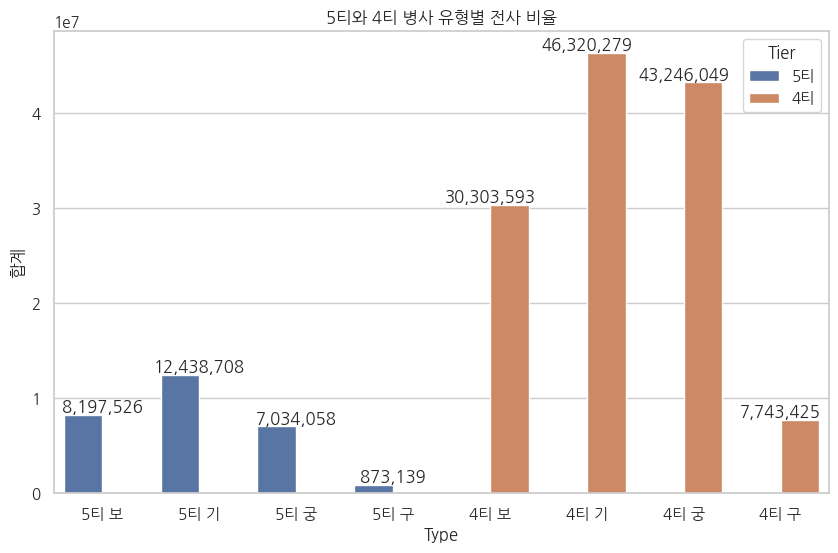

In [299]:
# Data preparation for seaborn barplot
data_5t_4t = pd.concat([sums_5t, sums_4t])
data_5t_4t['Tier'] = ['5티']*4 + ['4티']*4

# Create barplot
plt.figure(figsize=(10,6))
sns.barplot(x='Type', y='Sum', hue='Tier', data=data_5t_4t)

# 라벨값 추가
for index, value in enumerate(data_5t_4t['Sum']):
    plt.text(index, value, f'{value:,}', ha='center', va='bottom', fontsize=12)

plt.title('5티와 4티 병사 유형별 전사 비율')
plt.ylabel('합계')
plt.show()


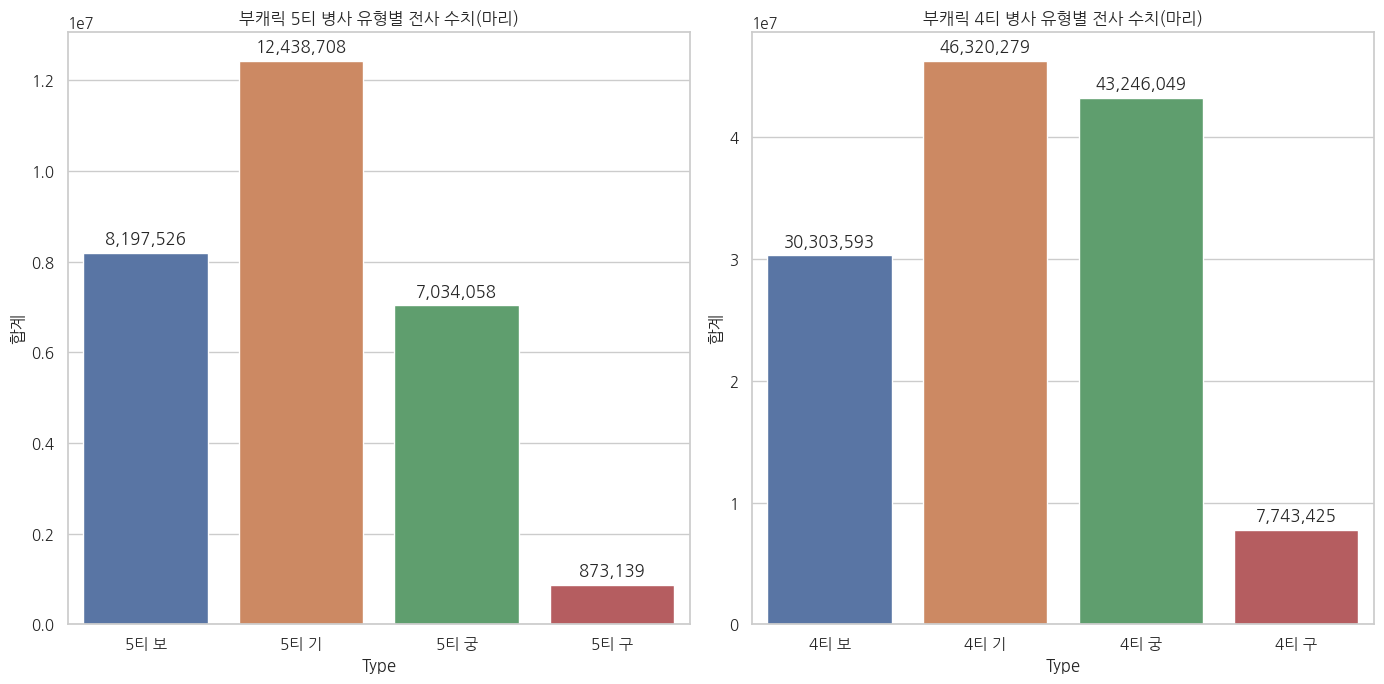

In [300]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Create barplot for 5t
sns.barplot(x='Type', y='Sum', data=sums_5t, ax=ax[0])
ax[0].set_title('부캐릭 5티 병사 유형별 전사 수치(마리)')
ax[0].set_ylabel('합계')

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), ',.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

# Create barplot for 4t
sns.barplot(x='Type', y='Sum', data=sums_4t, ax=ax[1])
ax[1].set_title('부캐릭 4티 병사 유형별 전사 수치(마리)')
ax[1].set_ylabel('합계')

for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), ',.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.tight_layout()
plt.show()


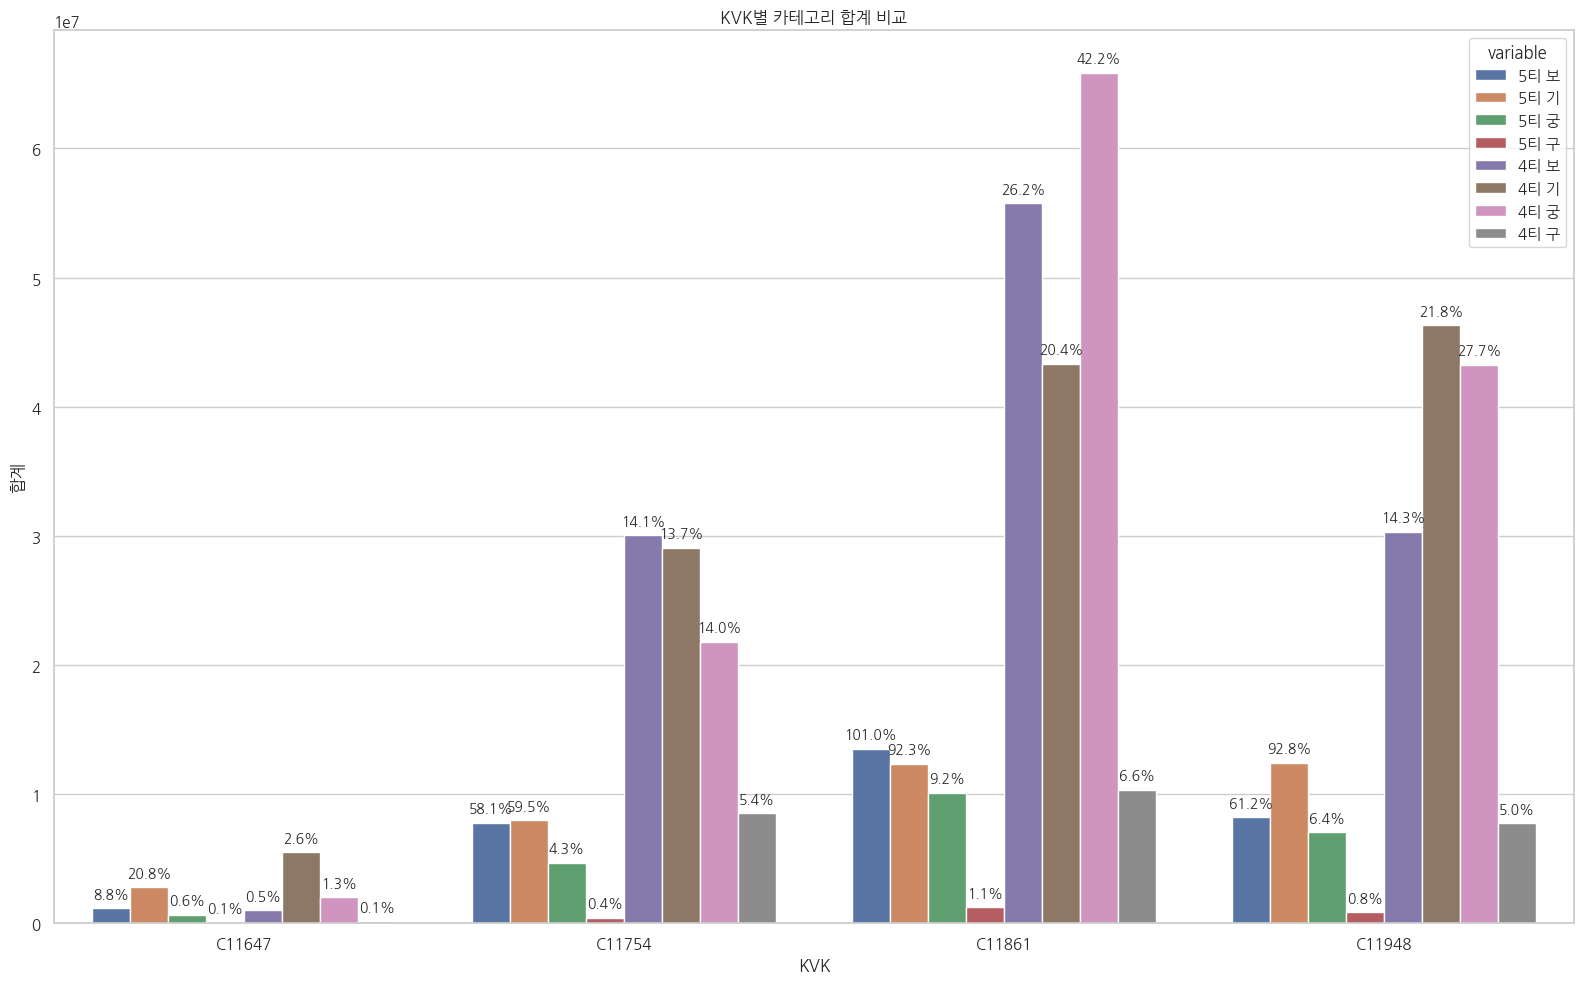

In [301]:
# 'C11647', 'C11754', 'C11861', 'C11948'에 해당하는 kvk만 필터링
filtered_data = grouped_data.loc[['C11647', 'C11754', 'C11861', 'C11948']]

# 각 그룹의 전체 합계 계산
total_per_group = filtered_data.sum(axis=1)

# 바 차트로 시각화
plt.figure(figsize=(16, 10))
sns_barplot = sns.barplot(data=filtered_data.reset_index().melt('kvk'), x='kvk', y='value', hue='variable')
plt.title('KVK별 카테고리 합계 비교')
plt.xlabel('KVK')
plt.ylabel('합계')

# 각 바에 대한 비율 라벨 추가
for idx, p in enumerate(sns_barplot.patches):
    bar_group_index = idx // 8  # 8개의 카테고리(5티 보, 5티 기, ... 4티 구)가 있기 때문
    kvk_value = filtered_data.index[bar_group_index]
    ratio = p.get_height() / total_per_group[kvk_value] * 100
    
    sns_barplot.annotate(f"{ratio:.1f}%",
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points',
                         fontsize=10)

plt.tight_layout()
plt.show()


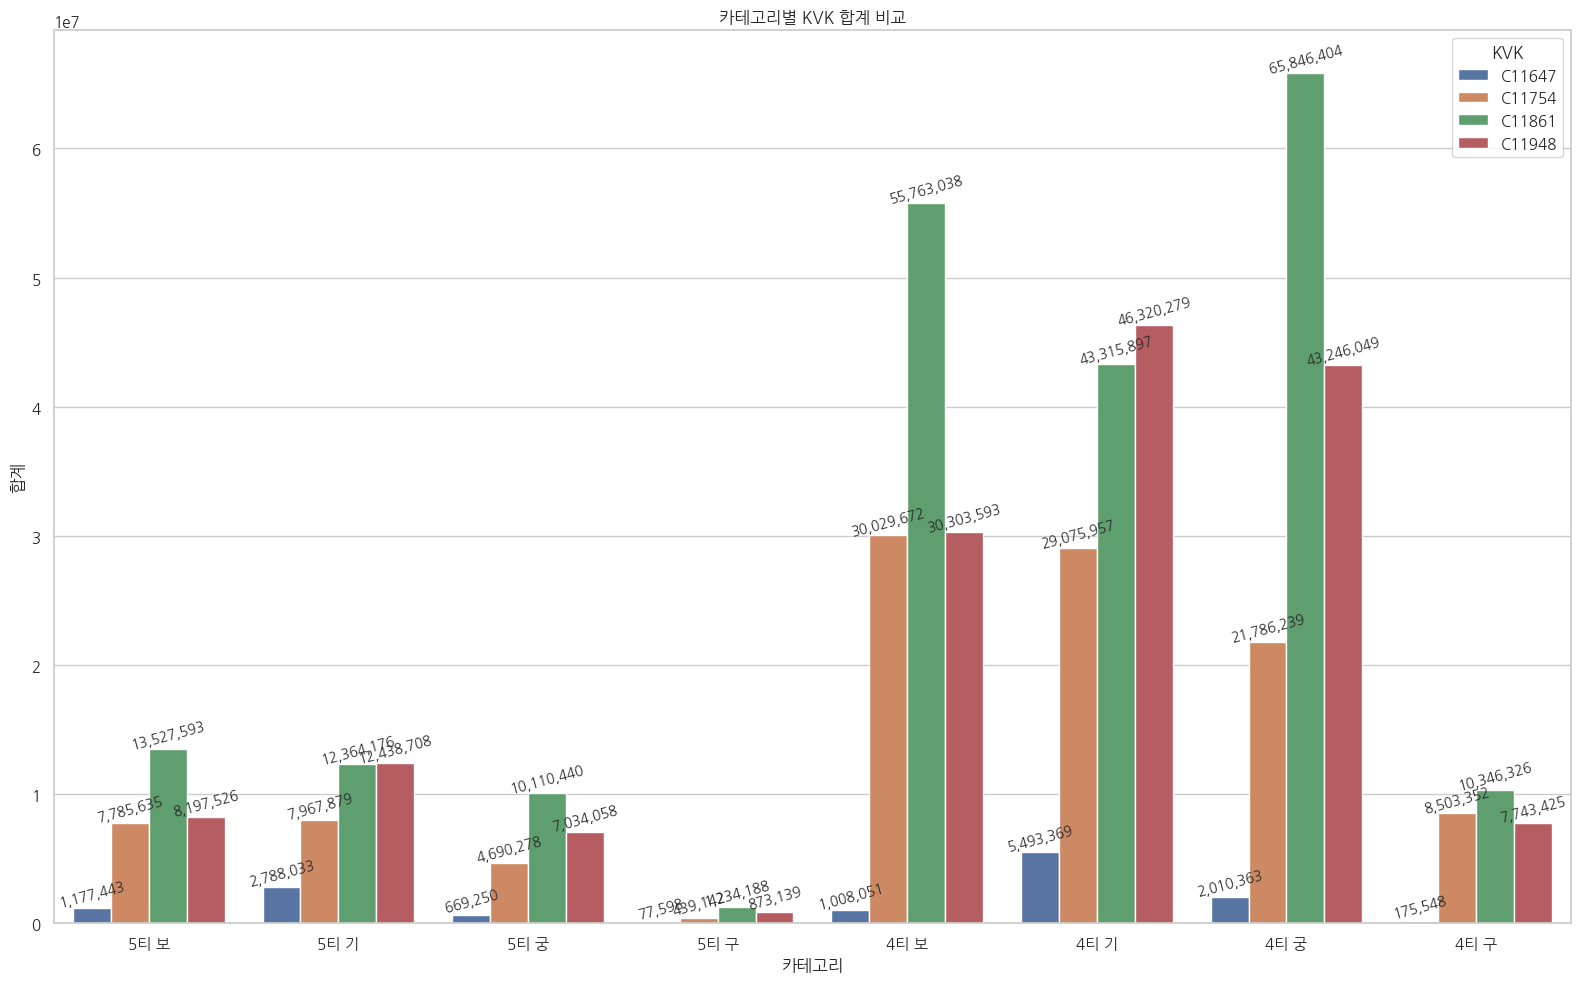

In [302]:
# 바 차트로 시각화
plt.figure(figsize=(16, 10))
sns_barplot = sns.barplot(data=filtered_data.reset_index().melt(id_vars='kvk'), 
                          x='variable', y='value', hue='kvk')

plt.title('카테고리별 KVK 합계 비교')
plt.xlabel('카테고리')
plt.ylabel('합계')

# 각 바에 대한 숫자 라벨 추가
for idx, p in enumerate(sns_barplot.patches):
    value = p.get_height()
    sns_barplot.annotate(f"{value:,.0f}",
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 10), 
                         textcoords='offset points',
                         fontsize=10,
                         rotation=15)  # 라벨에 30도의 회전 적용

plt.tight_layout()
plt.legend(title='KVK')
plt.show()


In [303]:
def plot_kvk_bar_chart(kvk_values):
    # 필요한 열만 선택
    cols_of_interest = ['kvk', '5티 보', '5티 기', '5티 궁', '5티 구', '4티 보', '4티 기', '4티 궁', '4티 구']
    
    # kvk에 따라 합계 계산
    grouped_data = data[cols_of_interest].groupby('kvk').sum()

    # 'kvk' 값으로 데이터 필터링
    filtered_data = grouped_data.loc[kvk_values]

    # 바 차트로 시각화
    plt.figure(figsize=(14, 8))
    sns_barplot = sns.barplot(data=filtered_data.reset_index().melt(id_vars='kvk'), 
                              x='variable', y='value', hue='kvk')

    plt.title('카테고리별 KVK 합계 비교')
    plt.xlabel('카테고리')
    plt.ylabel('합계')

    # 각 바에 대한 숫자 라벨 추가
    for idx, p in enumerate(sns_barplot.patches):
        value = p.get_height()
        sns_barplot.annotate(f"{value:,.0f}",
                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                             ha='center', va='center', 
                             xytext=(0, 10), 
                             textcoords='offset points',
                             fontsize=10,
                             rotation=30)  # 라벨에 30도의 회전 적용

    plt.tight_layout()
    plt.legend(title='KVK')
    plt.show()

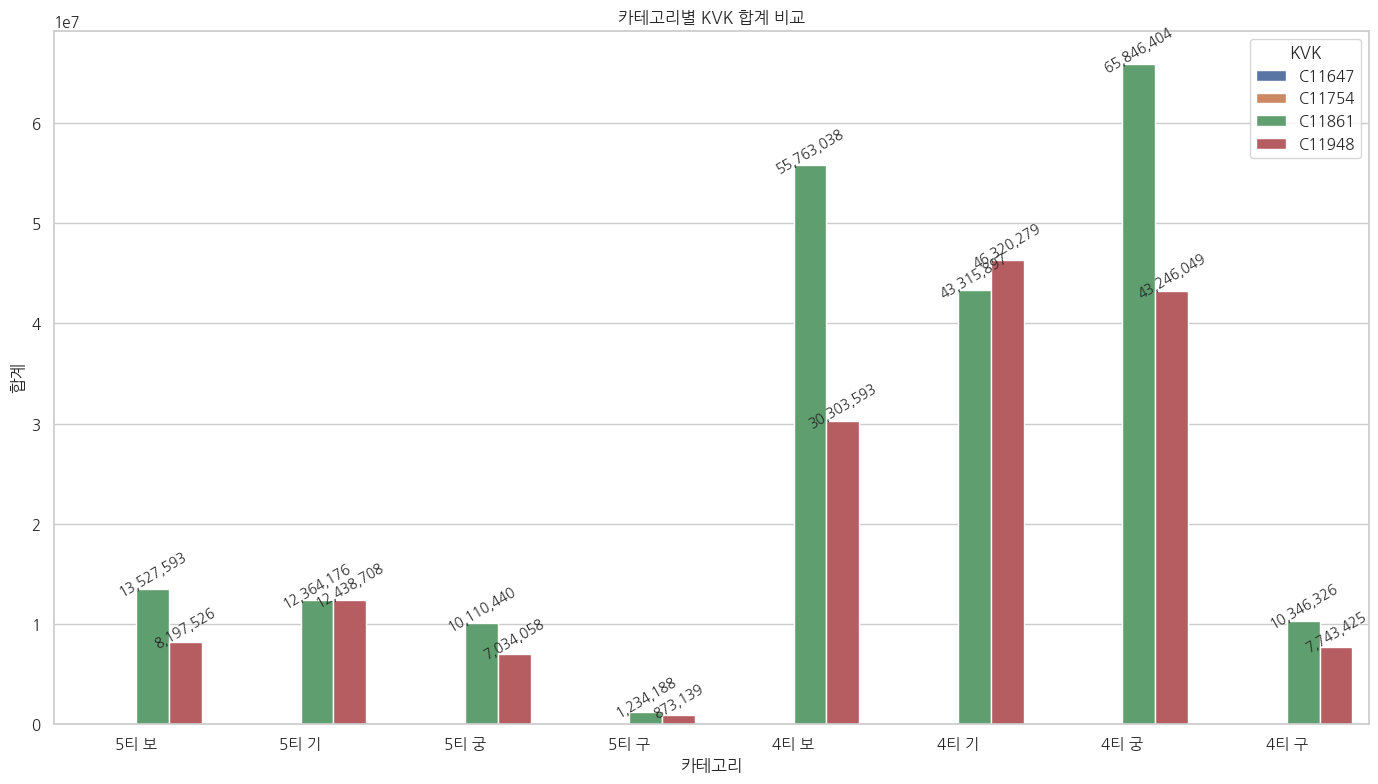

In [304]:
# 원하는 'kvk' 값들로 함수 호출
kvk_values_to_plot = ['C11861', 'C11948']
plot_kvk_bar_chart(kvk_values_to_plot)


## 랭킹

In [305]:
data.columns

Index(['kvk', '기여도 등수', 'UID', '닉네임', '투력', '킬포', '전사', '킬포증가', '본캐 5티 전사',
       '본캐 4티 전사', '본캐 총 전사', '본캐 전사 점수', '부캐 5티 전사', '부캐 4티 전사', '부캐 총 전사',
       '부캐 전사 점수', '전사 총점', '기여도 총점', '기여도 점수', '추가 기여도 점수', '킬포할당량',
       '킬포할당 달성률', '5티 보', '5티 기', '5티 궁', '5티 구', '4티 보', '4티 기', '4티 궁',
       '4티 구', 'UID_range'],
      dtype='object')

## 특정인 시각화 함수

In [306]:
kvk_data = data.copy()

# 'KVK' 컬럼을 특정 순서로 정렬하기 위해 Categorical 타입으로 변환
kvk_order = ['C11647', 'C11754', 'C11861', 'C11948']
kvk_data['kvk'] = pd.Categorical(kvk_data['kvk'], categories=kvk_order, ordered=True)

# 이제 'KVK' 컬럼을 기준으로 정렬
kvk_data = kvk_data.sort_values('kvk')


In [324]:
def visualize_user_data(data, uid):
    """
    주어진 UID에 대해 킬포증가, 전사 총점 및 기여도 등수를 시각화하는 함수

    Args:
    data (pd.DataFrame): 데이터셋
    uid (str): 사용자 식별자
    """

    # 해당 UID의 데이터 필터링
    kvk_data = data[data['UID'] == uid]

    # 'KVK' 컬럼을 특정 순서로 정렬하기 위해 Categorical 타입으로 변환
    kvk_order = ['C11647', 'C11754', 'C11861', 'C11948']
    kvk_data['kvk'] = pd.Categorical(kvk_data['kvk'], categories=kvk_order, ordered=True)

    # 'KVK' 컬럼을 기준으로 정렬
    kvk_data = kvk_data.sort_values('kvk')

    # 그래프 크기 설정
    plt.figure(figsize=(14, 10))

    # 첫 번째 y축 (왼쪽) - 데이터 포인트만 표시 (킬포증가)
    ax1 = plt.gca()
    ax1.plot(kvk_data['kvk'], kvk_data['킬포증가'], marker='o', linestyle='solid', color='blue', label='킬포증가', zorder=3)
    ax1.set_xlabel('KVK')
    ax1.set_ylabel('킬포증가', color='blue')
    ax1.grid(False)
    ax1.tick_params(axis='y', labelcolor='blue')

    # ax1의 y축 범위 설정
    ax1.set_ylim(data['킬포증가'].min(), data['킬포증가'].max())

    # '킬포증가'에 대한 레이블 추가 (억 단위로 표현)
    for index, row in kvk_data.iterrows():
        label = f"{row['킬포증가'] / 100000000:.1f}억"
        ax1.text(row['kvk'], row['킬포증가'], label, fontsize=14, color='blue', horizontalalignment='center', verticalalignment='bottom')

    # 두 번째 y축 (오른쪽) - 막대 그래프 (전사 총점)
    ax2 = ax1.twinx()
    ax2.bar(kvk_data['kvk'], kvk_data['전사 총점'], color='black', label='전사 총점', alpha=0.4)
    ax2.set_ylabel('전사 총점', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.grid(False)
    ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

    # ax2의 y축 범위 설정
    ax2.set_ylim(0, data['전사 총점'].max())

    # '전사 총점'에 대한 레이블 추가
    for index, row in kvk_data.iterrows():
        ax2.text(row['kvk'], row['전사 총점'], f"{row['전사 총점']:,}", fontsize=9, color='black', horizontalalignment='center', verticalalignment='bottom')

    # 세 번째 y축 (오른쪽) - 점 그래프 (기여도 등수)
    ax3 = ax1.twinx()
    ax3.scatter(kvk_data['kvk'], kvk_data['기여도 등수'], color='green', label='기여도 등수')
    ax3.set_ylabel('기여도 등수', color='green')
    ax3.tick_params(axis='y', labelcolor='green')
    ax3.grid(False)
    ax3.set_ylim(120, 1)

    # '기여도 등수'에 대한 레이블 추가 ('등'으로 표현)
    for index, row in kvk_data.iterrows():
        rank = int(row['기여도 등수'])  # 소수점을 제거하고 정수로 변환
        ax3.text(row['kvk'], row['기여도 등수'], f"{rank}등", fontsize=9, color='green', 
                horizontalalignment='center', verticalalignment='bottom')

    ax3.spines['right'].set_position(('outward', 60))

    # 그래프 제목 설정
    plt.title(f"{uid}의 KVK 별 킬포증가, 전사 총점 및 기여도 등수")
    # plt.title(f"{uid}의 KVK 별 킬포증가, 전사 총점 및 기여도 등수")

    # 범례 표시 - 위치 및 폰트 크기 조정
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.95))
    ax3.legend(loc='upper right', bbox_to_anchor=(1, 0.90))


    # 그리드 표시
    ax1.grid(True)

    # 그래프 표시
    plt.show()

# 사용 예시
# visualize_user_data(데이터셋, '32689827')

32689827
33678632
33912735
31687561
31651829

33547899
35232227
31687561
33678632
33489414
34797972 
93872255
80117939
35271079
32010568

C:\Users\user\AppData\Local\Temp\ipykernel_10780\2959386461.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



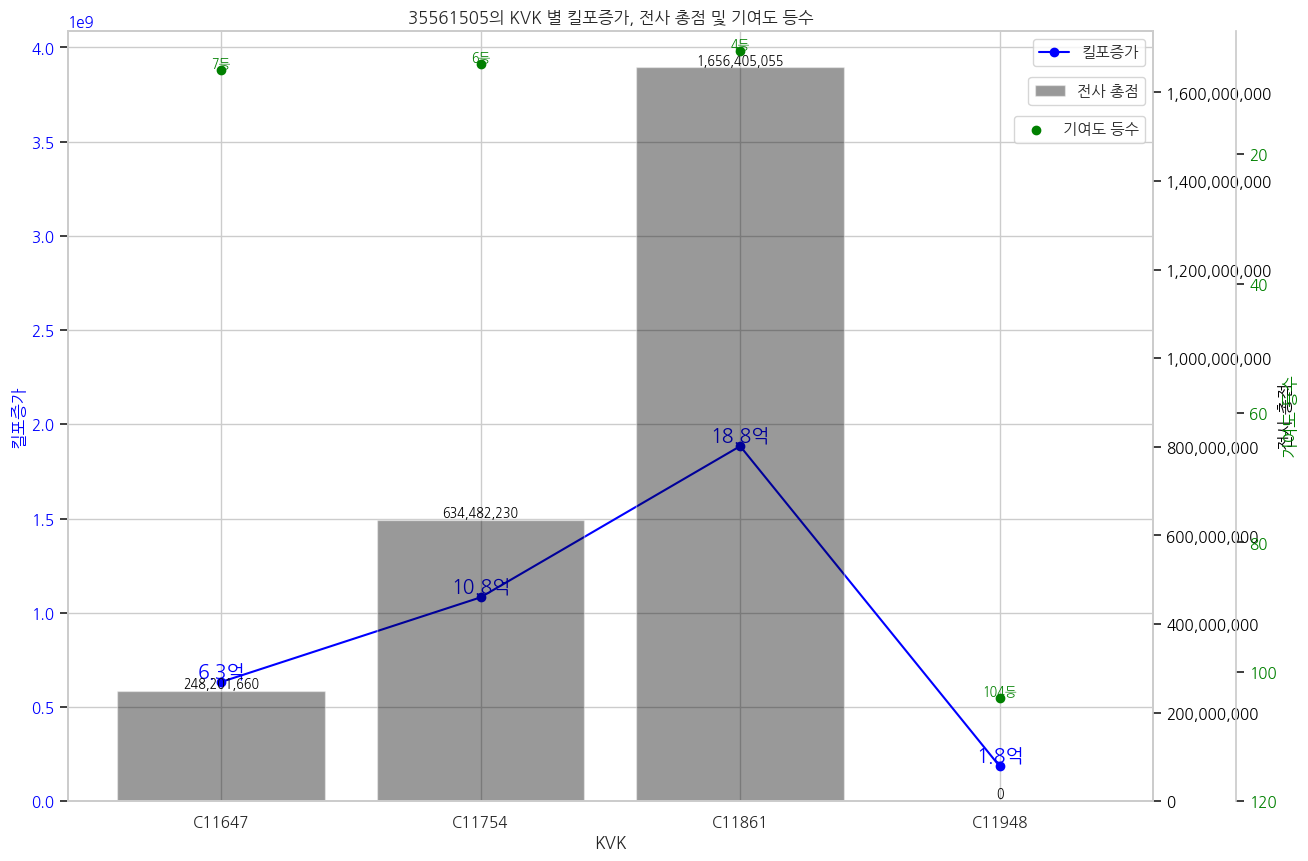

In [325]:
visualize_user_data(data, 35561505)

33489414

C:\Users\user\AppData\Local\Temp\ipykernel_10780\3334684745.py:30: UserWarning:

Glyph 65440 (\N{HALFWIDTH HANGUL FILLER}) missing from current font.

C:\Users\user\AppData\Local\Temp\ipykernel_10780\3334684745.py:30: UserWarning:

Glyph 7472 (\N{MODIFIER LETTER CAPITAL D}) missing from current font.

C:\Users\user\AppData\Local\Temp\ipykernel_10780\3334684745.py:30: UserWarning:

Glyph 214 (\N{LATIN CAPITAL LETTER O WITH DIAERESIS}) missing from current font.

C:\Users\user\AppData\Local\Temp\ipykernel_10780\3334684745.py:30: UserWarning:

Glyph 7480 (\N{MODIFIER LETTER CAPITAL L}) missing from current font.

C:\Users\user\AppData\Local\Temp\ipykernel_10780\3334684745.py:30: UserWarning:

Glyph 65426 (\N{HALFWIDTH KATAKANA LETTER ME}) missing from current font.

C:\Users\user\AppData\Local\Temp\ipykernel_10780\3334684745.py:30: UserWarning:

Glyph 7477 (\N{MODIFIER LETTER CAPITAL I}) missing from current font.

C:\Users\user\AppData\Local\Temp\ipykernel_10780\3334684745.py:30: UserWar

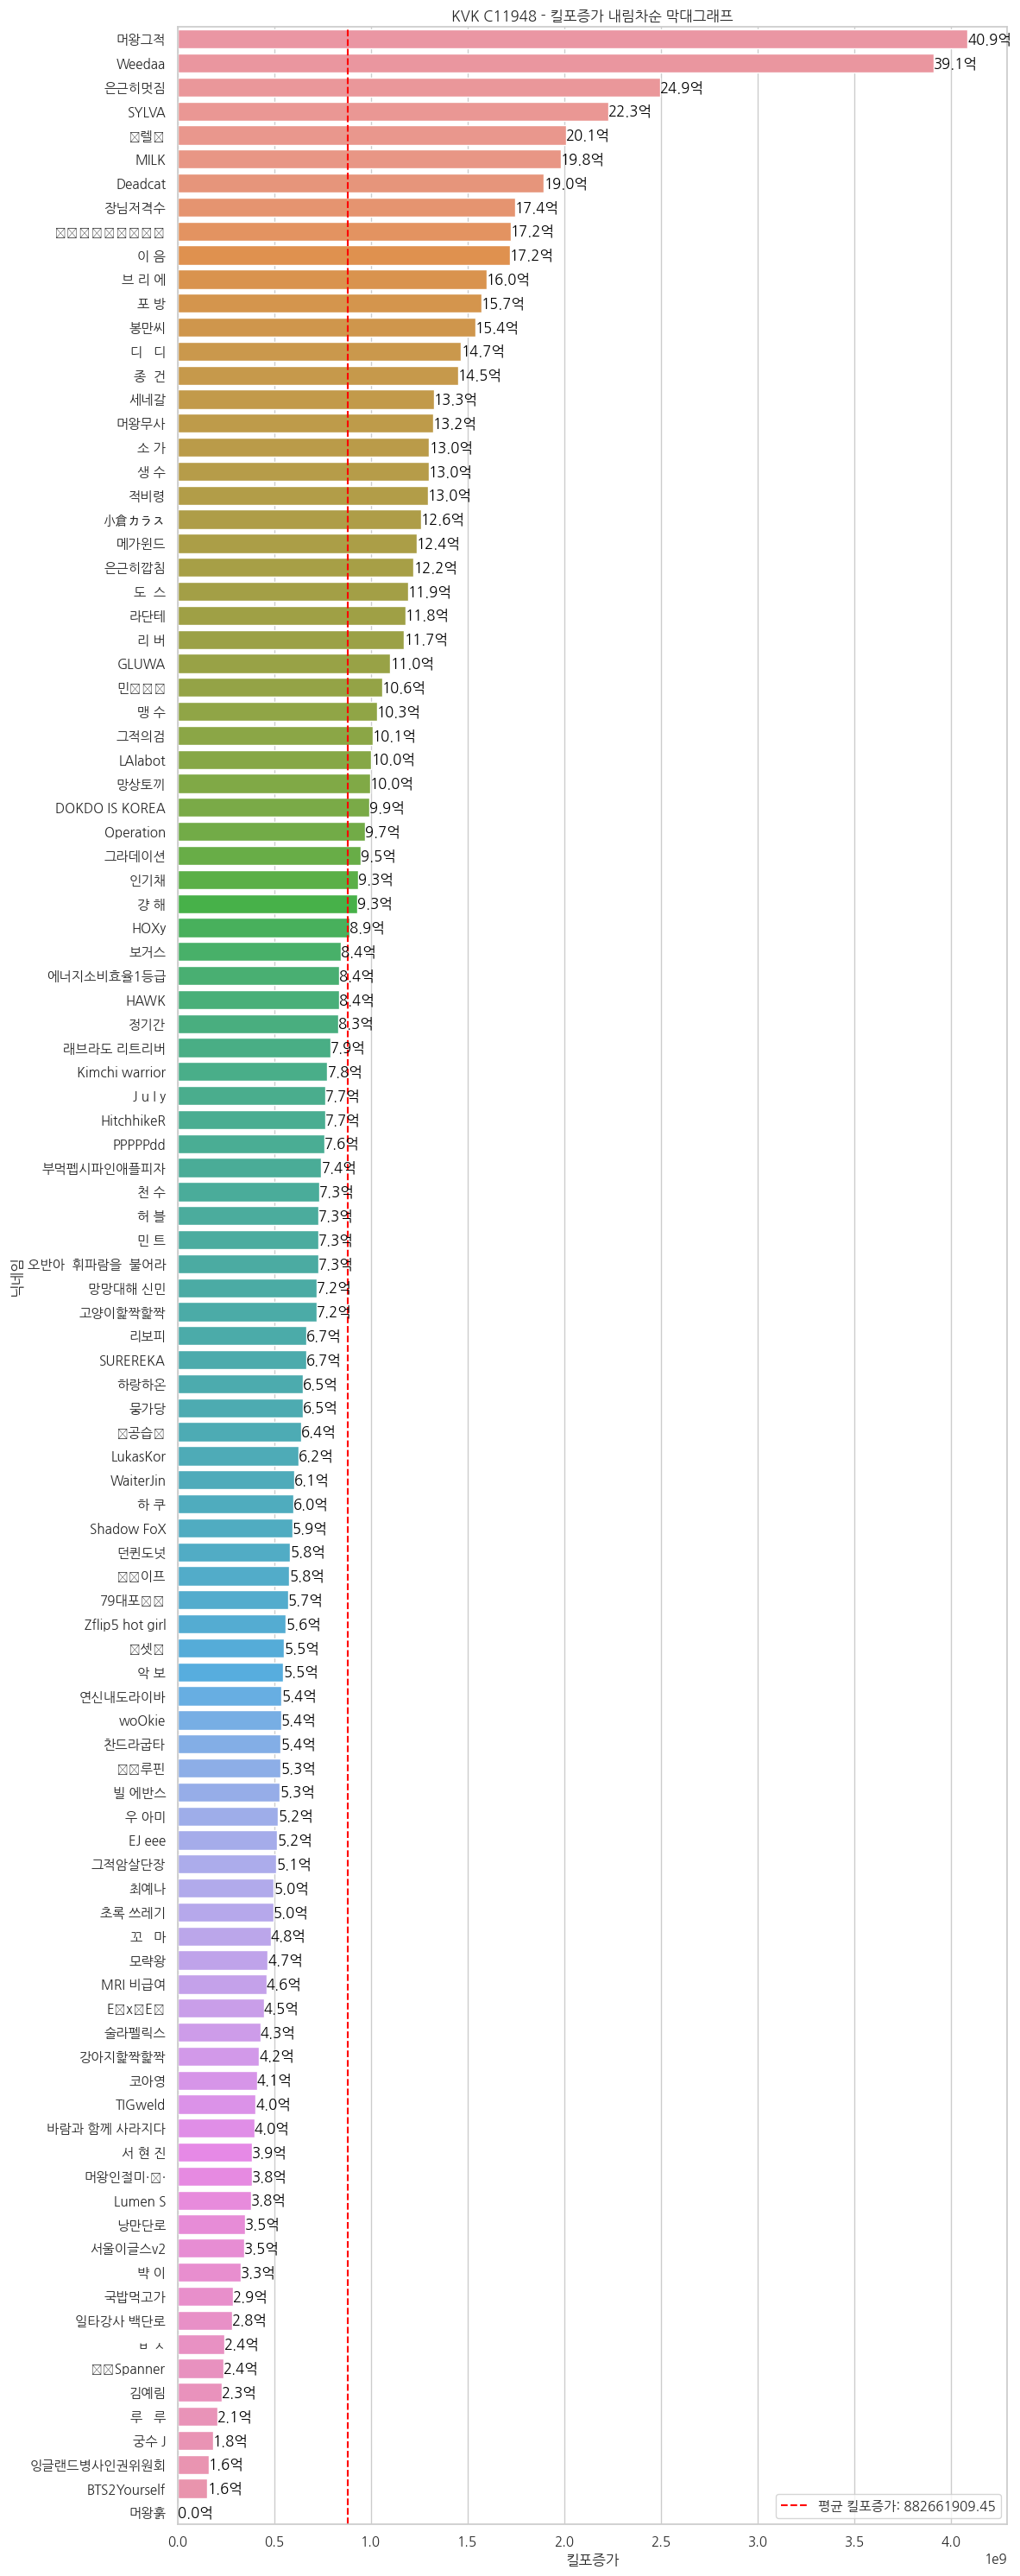

In [326]:
# 'kvk'가 'C11948'인 데이터 필터링
filtered_data = data[data['kvk'] == 'C11948']

# '킬포증가'를 내림차순으로 정렬
sorted_data = filtered_data.sort_values('킬포증가', ascending=False)

# 막대그래프 그리기
plt.figure(figsize=(12, 30))
bar_plot = sns.barplot(y='닉네임', x='킬포증가', data=sorted_data, order=sorted_data['닉네임'])

# 평균값 계산
mean_value = sorted_data['킬포증가'].mean()

# 평균선 추가
plt.axvline(mean_value, color='red', linestyle='--', label=f'평균 킬포증가: {mean_value:.2f}')

# 레이블 추가
for index, value in enumerate(sorted_data['킬포증가']):
    plt.text(value, index, f'{value / 1e8:.1f}억', color='black', ha="left", va="center")

# 그래프 제목 및 축 라벨 설정
plt.title('KVK C11948 - 킬포증가 내림차순 막대그래프')
plt.ylabel('닉네임')
plt.xlabel('킬포증가')

# 범례 표시
plt.legend()

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

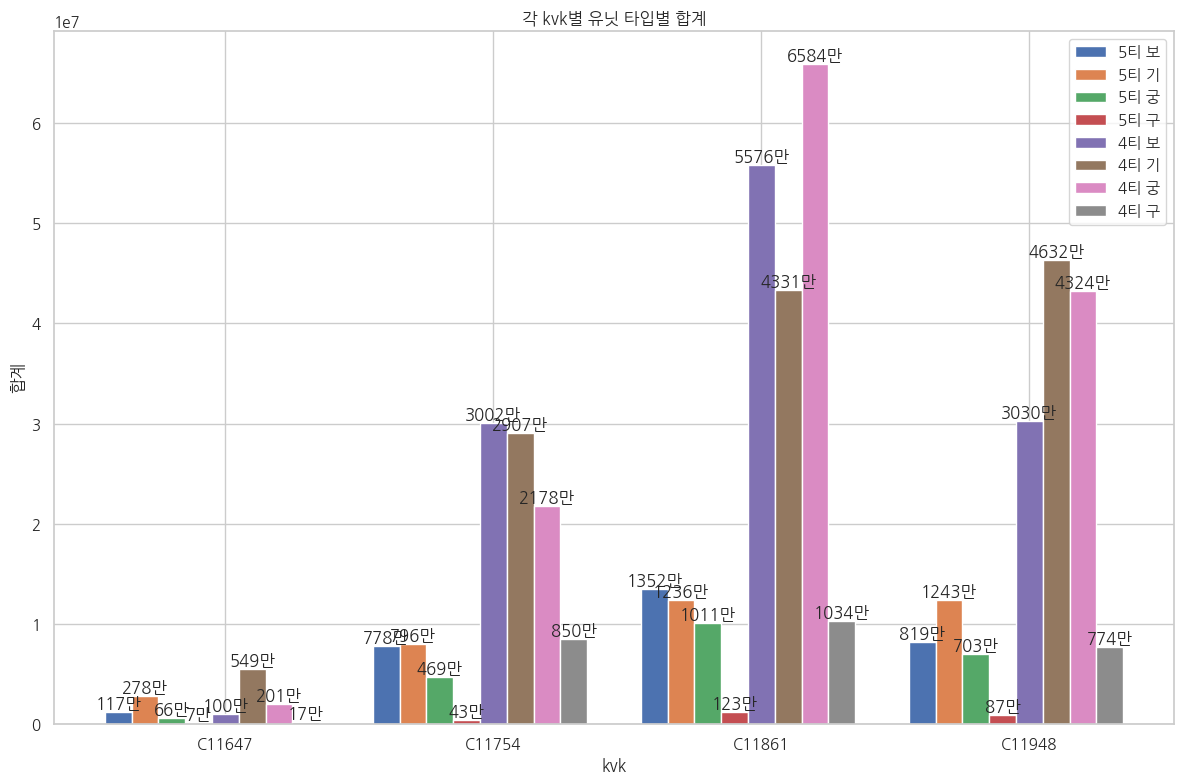

In [317]:
# 데이터를 준비합니다.
unique_kvk_values = ['C11647', 'C11754', 'C11861', 'C11948']
all_sums = []

# 각 'kvk' 값에 대한 데이터를 가져와서 리스트에 추가합니다.
for kvk_value in unique_kvk_values:
    sums_5t, sums_4t = compute_sums_by_kvk(kvk_value)
    all_sums.append(pd.concat([sums_5t, sums_4t]))

# 새로운 데이터프레임을 생성합니다. 이때, 'kvk' 값을 열 이름으로 사용합니다.
result_df = pd.DataFrame()

for i, kvk_value in enumerate(unique_kvk_values):
    # 각 'kvk'에 대한 합계 데이터를 열로 추가합니다.
    kvk_sums = all_sums[i]['Sum'].reset_index(drop=True)
    result_df[kvk_value] = kvk_sums

# 유닛 타입을 행 인덱스로 설정합니다.
result_df.index = ['5티 보', '5티 기', '5티 궁', '5티 구', '4티 보', '4티 기', '4티 궁', '4티 구']

# 막대 차트를 그립니다.
n_types = len(result_df.index)
bar_width = 0.1
index = np.arange(len(unique_kvk_values))

plt.figure(figsize=(12, 8))

for i, type in enumerate(result_df.index):
    bars = plt.bar(index + i * bar_width, result_df.loc[type], bar_width, label=type)

    # 각 막대에 레이블 추가
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval / 10000)}만', ha='center', va='bottom')

plt.xlabel('kvk')
plt.ylabel('합계')
plt.title('각 kvk별 유닛 타입별 합계')
plt.xticks(index + bar_width / 2 * n_types, unique_kvk_values)
plt.legend()

plt.tight_layout()
plt.show()

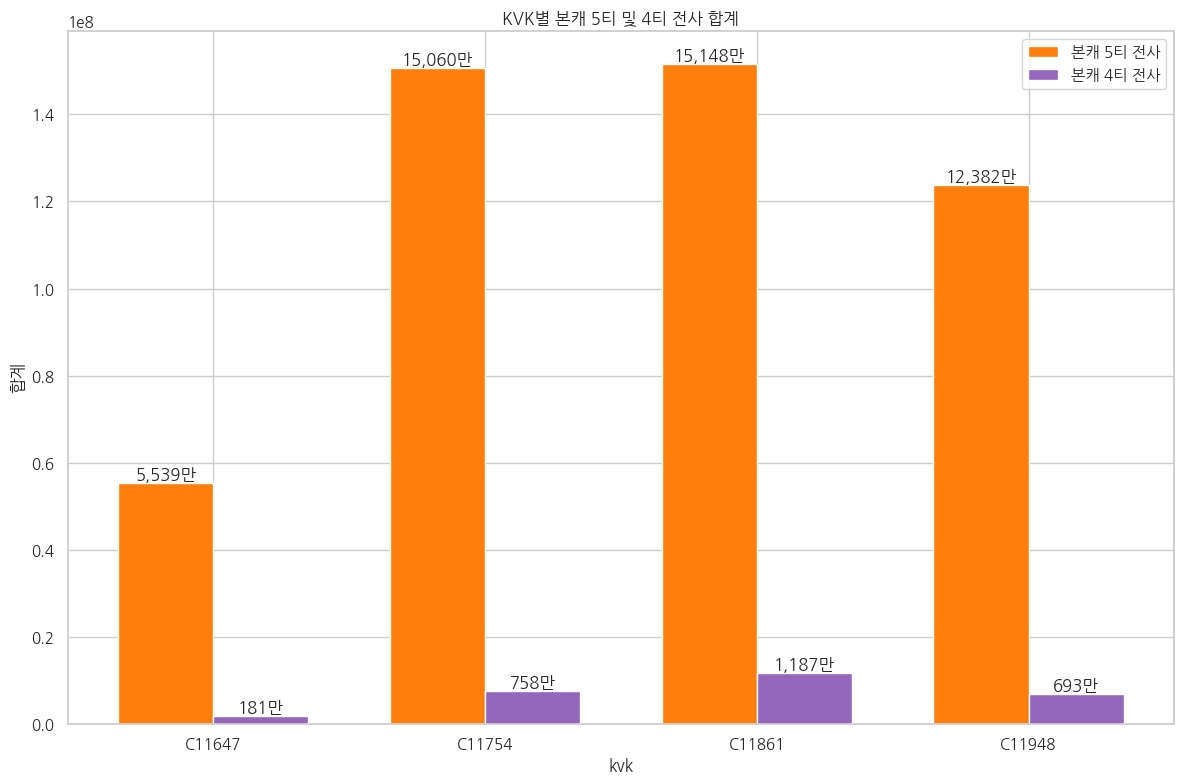

In [318]:
# 데이터를 준비합니다.
unique_kvk_values = ['C11647', 'C11754', 'C11861', 'C11948']
all_sums = []

# 각 'kvk' 값에 대한 데이터를 가져와서 리스트에 추가합니다.
for kvk_value in unique_kvk_values:
    subset_data = data[data['kvk'] == kvk_value]
    sum_5t_bonka = subset_data['본캐 5티 전사'].sum()
    sum_4t_bonka = subset_data['본캐 4티 전사'].sum()
    all_sums.append([sum_5t_bonka, sum_4t_bonka])

# 새로운 데이터프레임을 생성합니다.
result_df = pd.DataFrame(all_sums, columns=['본캐 5티 전사', '본캐 4티 전사'])
result_df.index = unique_kvk_values

# 막대 차트를 그립니다.
n_groups = len(unique_kvk_values)
bar_width = 0.35
index = np.arange(n_groups)

plt.figure(figsize=(12, 8))

bars1 = plt.bar(index, result_df['본캐 5티 전사'], bar_width, color='#ff7f0e', label='본캐 5티 전사')
bars2 = plt.bar(index + bar_width, result_df['본캐 4티 전사'], bar_width, color='#9467bd', label='본캐 4티 전사')

# 각 막대에 레이블 추가
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval/10000:,.0f}만', ha='center', va='bottom')

plt.xlabel('kvk')
plt.ylabel('합계')
plt.title('KVK별 본캐 5티 및 4티 전사 합계')
plt.xticks(index + bar_width / 2, unique_kvk_values)
plt.legend()

plt.tight_layout()
plt.show()
